In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn import over_sampling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

Data Information

In [3]:
data = pd.read_csv('Training Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
data.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

EDA

Pendekatan Numerik (Data Angka)

In [5]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Pendekatan Numerik (Non-Angka)

In [6]:
datana = pd.read_csv('Training Data.csv')
datana = datana.drop(labels = ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'], axis = 1)
datana.describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


Pendekatan Grafis

Univariate Analysis

Data Angka (Univariate + Multivariate [karena saya lihat bisa lebih efisien])

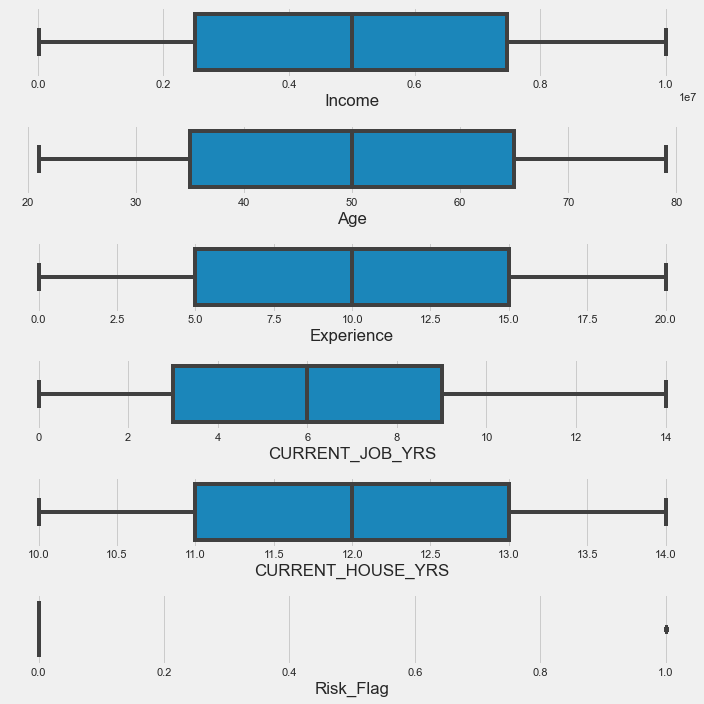

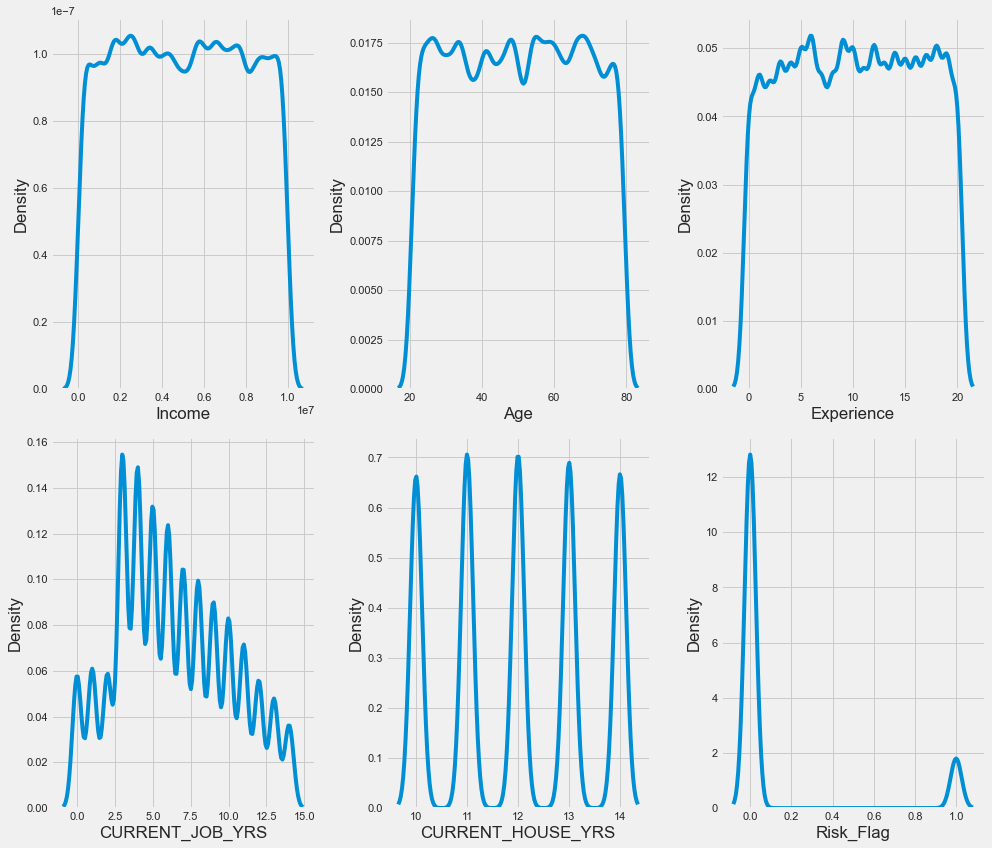

In [7]:
fig, axes = plt.subplots(6, 1, figsize =(10,10))
sns.boxplot(x='Income', data=data, orient='h', ax=axes[0])
sns.boxplot(x='Age', data=data, orient="h", ax=axes[1])
sns.boxplot(x='Experience', data=data, orient="h", ax=axes[2])
sns.boxplot(x='CURRENT_JOB_YRS', data=data, orient="h", ax=axes[3])
sns.boxplot(x='CURRENT_HOUSE_YRS', data=data, orient="h", ax=axes[4])
sns.boxplot(x='Risk_Flag', data=data, orient="h", ax=axes[5])

plt.tight_layout()

fig, axes = plt.subplots(2, 3, figsize =(14,12))
sns.distplot(data['Income'], ax=axes[0, 0], hist=False)
sns.distplot(data['Age'], ax=axes[0, 1], hist=False)
sns.distplot(data['Experience'], ax=axes[0, 2], hist=False)
sns.distplot(data['CURRENT_JOB_YRS'], ax=axes[1, 0], hist=False)
sns.distplot(data['CURRENT_HOUSE_YRS'], ax=axes[1, 1], hist=False)
sns.distplot(data['Risk_Flag'], ax=axes[1, 2], hist=False)
plt.tight_layout()

Data Non Angka

,feature,values
0,Married/Single,2
1,House_Ownership,3
2,Car_Ownership,2
3,Profession,51
4,CITY,317
5,STATE,29


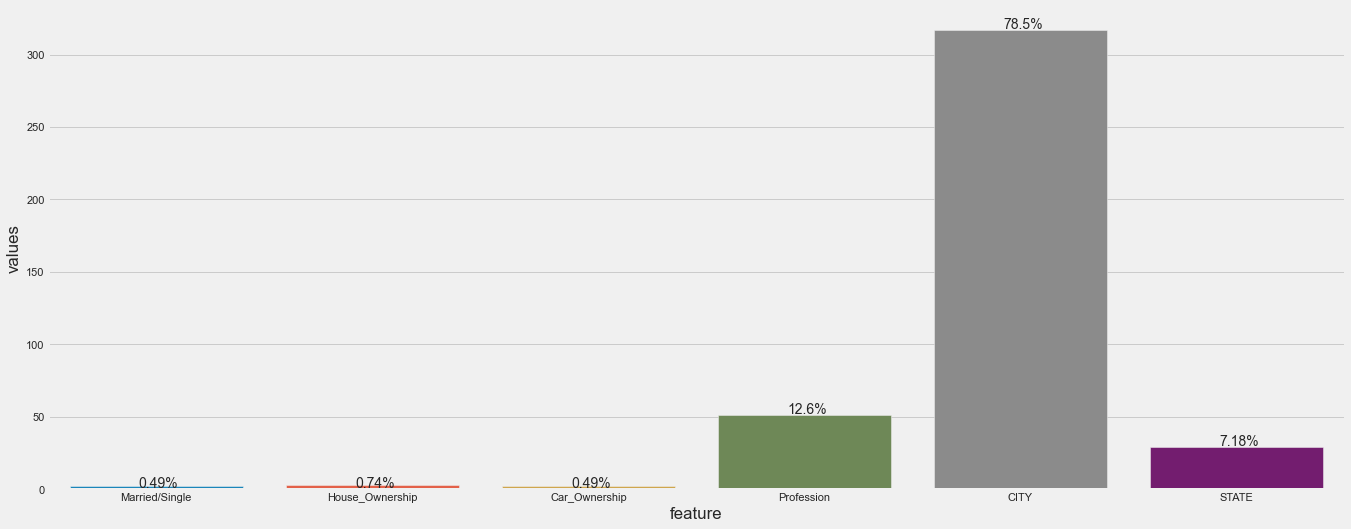

In [8]:
datana_dist = pd.DataFrame({'feature': ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'],
                           'values': [2, 3, 2, 51, 317, 29]})
sns.barplot(x = 'feature',y='values',data=datana_dist)
plt.text(x=-0.08, y = 1, s= '0.49%')
plt.text(x=0.92, y = 1, s= '0.74%')
plt.text(x=1.92, y = 1, s= '0.49%')
plt.text(x=2.92, y = 52, s= '12.6%')
plt.text(x=3.92, y = 318, s= '78.5%')
plt.text(x=4.92, y = 30, s= '7.18%')
datana_dist

Data Non Angka (Married/Single)

,Married/Single,Jumlah
1,single,226272
0,married,25728


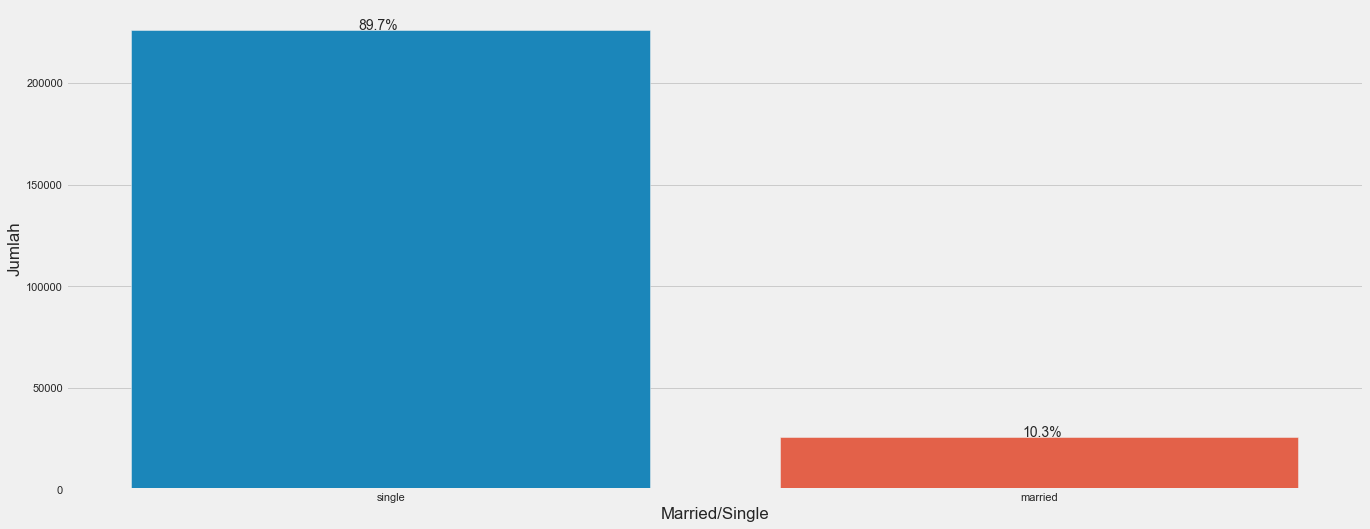

In [9]:
datana_ms_top10_1 = datana.groupby(['Married/Single']).agg({'Married/Single': ['count']}).reset_index()
datana_ms_top10_1.columns = ['Married/Single', 'Jumlah']
datana_ms_top10_2 = datana_ms_top10_1.sort_values('Jumlah', ascending=False)
sns.barplot(x='Married/Single', y='Jumlah', data=datana_ms_top10_2)
plt.text(x=-0.05, y = 226273, s= '89.7%')
plt.text(x=0.975, y = 25728, s= '10.3%')
datana_ms_top10_2

Data Non Angka (House Owner)

,House_Ownership,Jumlah
2,rented,231898
1,owned,12918
0,norent_noown,7184


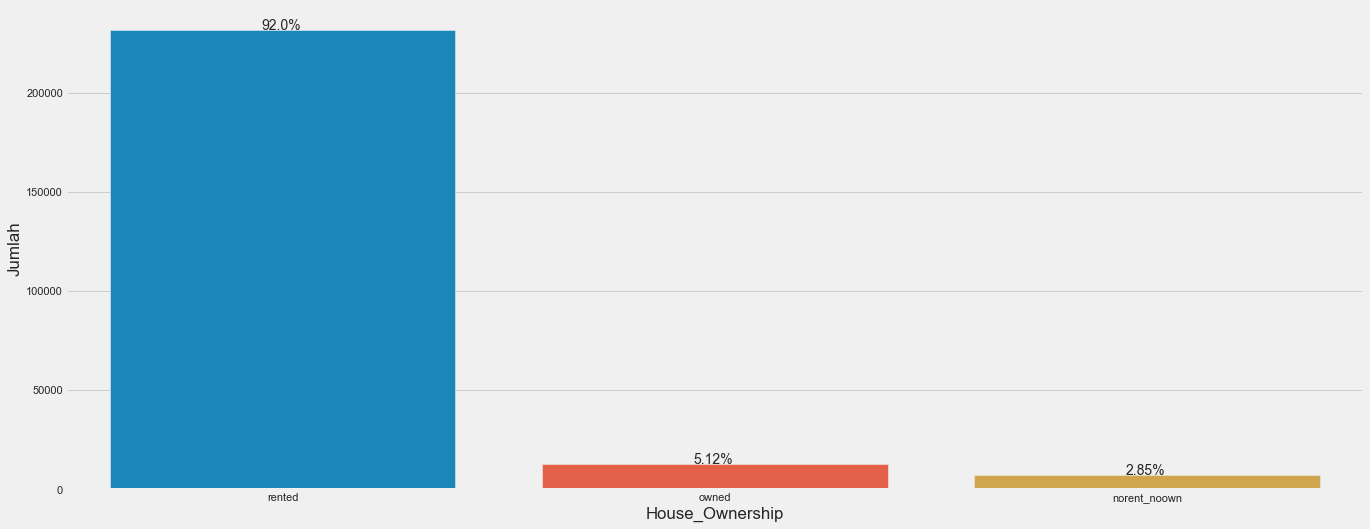

In [10]:
datana_ho_top10_1 = datana.groupby(['House_Ownership']).agg({'House_Ownership': ['count']}).reset_index()
datana_ho_top10_1.columns = ['House_Ownership', 'Jumlah']
datana_ho_top10_2 = datana_ho_top10_1.sort_values('Jumlah', ascending=False)
sns.barplot(x='House_Ownership', y='Jumlah', data=datana_ho_top10_2)
plt.text(x=-0.05, y = 231899, s= '92.0%')
plt.text(x=0.95, y = 12919, s= '5.12%')
plt.text(x=1.95, y = 7185, s= '2.85%')
datana_ho_top10_2

Data Non Angka (Car Ownership)

,Car_Ownership,Jumlah
0,no,176000
1,yes,76000


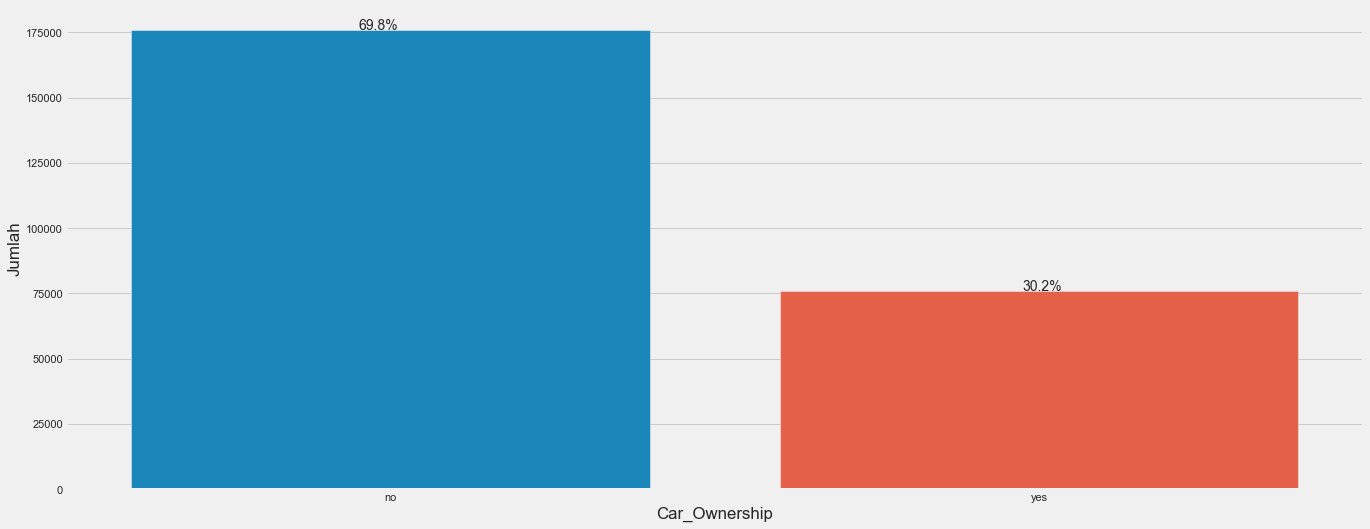

In [11]:
datana_co_top10_1 = datana.groupby(['Car_Ownership']).agg({'Car_Ownership': ['count']}).reset_index()
datana_co_top10_1.columns = ['Car_Ownership', 'Jumlah']
datana_co_top10_2 = datana_co_top10_1.sort_values('Jumlah', ascending=False)
sns.barplot(x='Car_Ownership', y='Jumlah', data=datana_co_top10_2)
plt.text(x=-0.05, y = 176001, s= '69.8%')
plt.text(x=0.975, y = 76001, s= '30.2%')
datana_co_top10_2

Data Non Angka (Profession)

,Profession,Jumlah
37,Physician,5957
44,Statistician,5806
50,Web_designer,5397
40,Psychologist,5390
13,Computer_hardware_engineer,5372
19,Drafter,5359
32,Magistrate,5357
22,Fashion_Designer,5304
0,Air_traffic_controller,5281
12,Comedian,5259


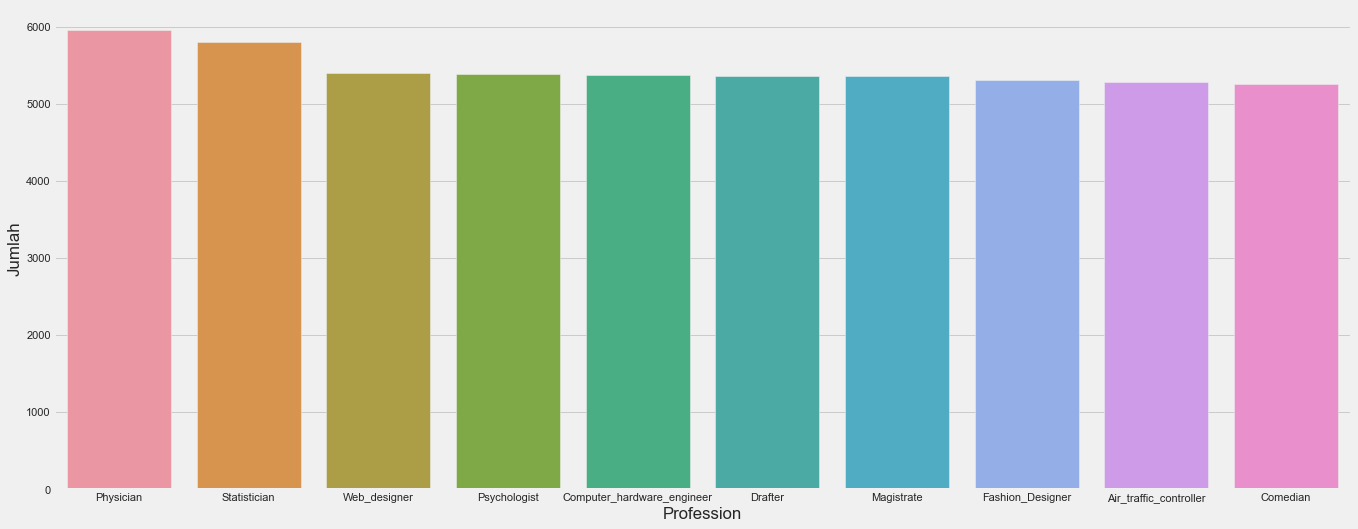

In [12]:
datana_p_top10_1 = datana.groupby(['Profession']).agg({'Profession': ['count']}).reset_index()
datana_p_top10_1.columns = ['Profession', 'Jumlah']
datana_p_top10_2 = datana_p_top10_1.sort_values('Jumlah', ascending=False).head(10)
sns.barplot(x='Profession', y='Jumlah', data=datana_p_top10_2)
datana_p_top10_2

Data Non Angka (City)

,CITY,Jumlah
312,Vijayanagaram,1259
53,Bhopal,1208
64,Bulandshahr,1185
256,Saharsa[29],1180
313,Vijayawada,1172
281,Srinagar,1136
126,Indore,1130
214,New_Delhi,1098
113,Hajipur[31],1098
262,Satara,1096


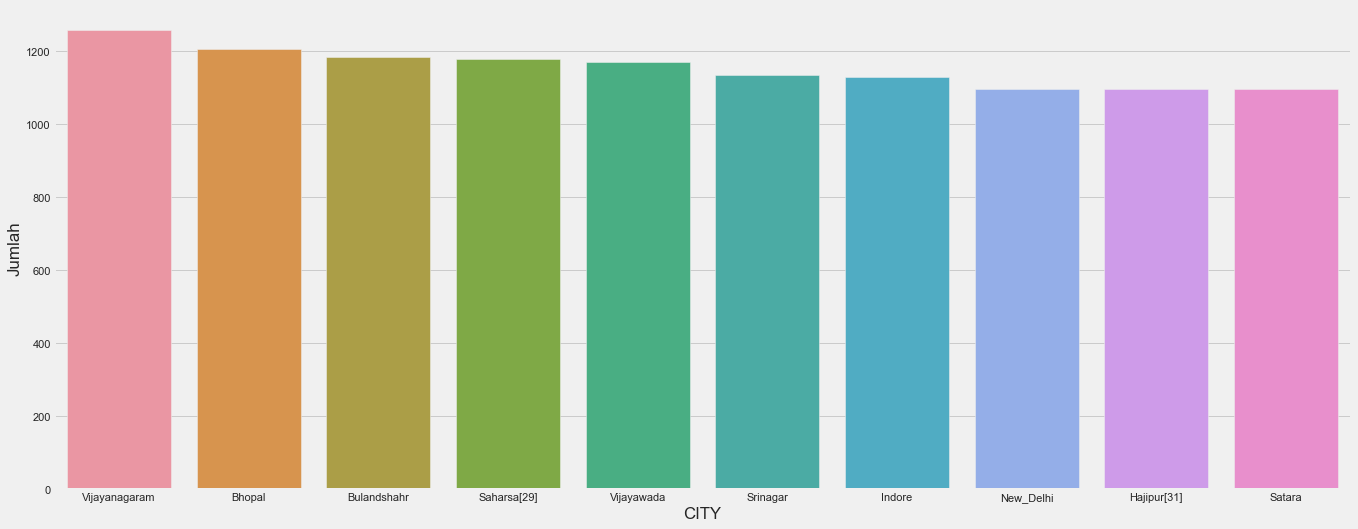

In [13]:
datana_c_top10_1 = datana.groupby(['CITY']).agg({'CITY': ['count']}).reset_index()
datana_c_top10_1.columns = ['CITY', 'Jumlah']
datana_c_top10_2 = datana_c_top10_1.sort_values('Jumlah', ascending=False).head(10)
sns.barplot(x='CITY', y='Jumlah', data=datana_c_top10_2)
datana_c_top10_2

Data Non Angka (State)

,STATE,Jumlah
25,Uttar_Pradesh,28400
14,Maharashtra,25562
0,Andhra_Pradesh,25297
28,West_Bengal,23483
2,Bihar,19780
22,Tamil_Nadu,16537
13,Madhya_Pradesh,14122
11,Karnataka,11855
6,Gujarat,11408
20,Rajasthan,9174


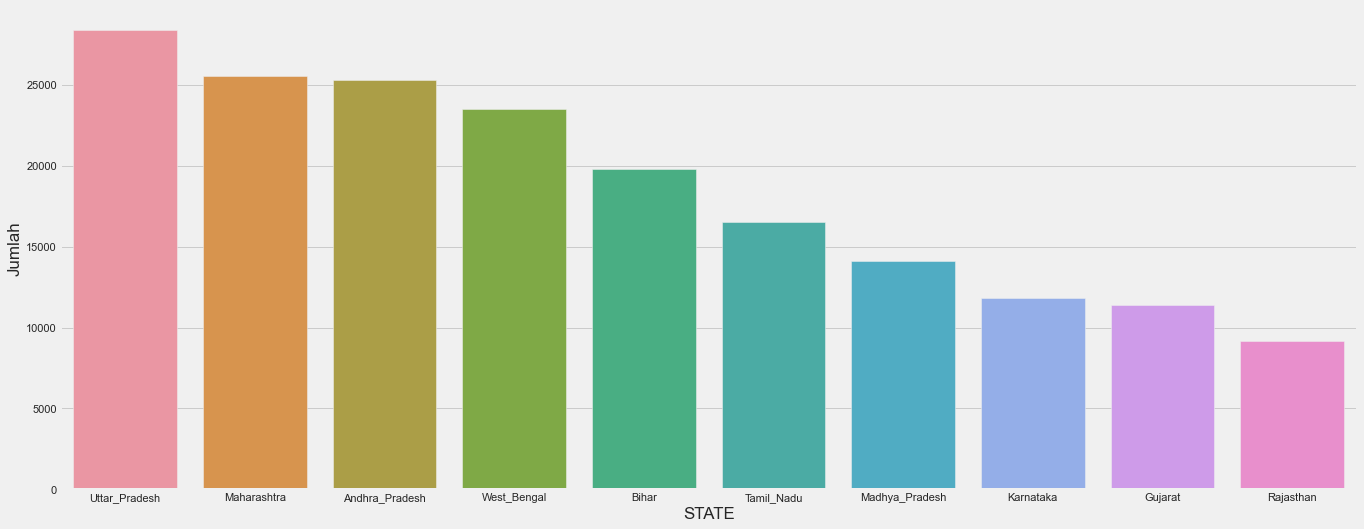

In [14]:
datana_s_top10_1 = datana.groupby(['STATE']).agg({'STATE': ['count']}).reset_index()
datana_s_top10_1.columns = ['STATE', 'Jumlah']
datana_s_top10_2 = datana_s_top10_1.sort_values('Jumlah', ascending=False).head(10)
sns.barplot(x='STATE', y='Jumlah', data=datana_s_top10_2)
datana_s_top10_2

Multivariate Anaysis

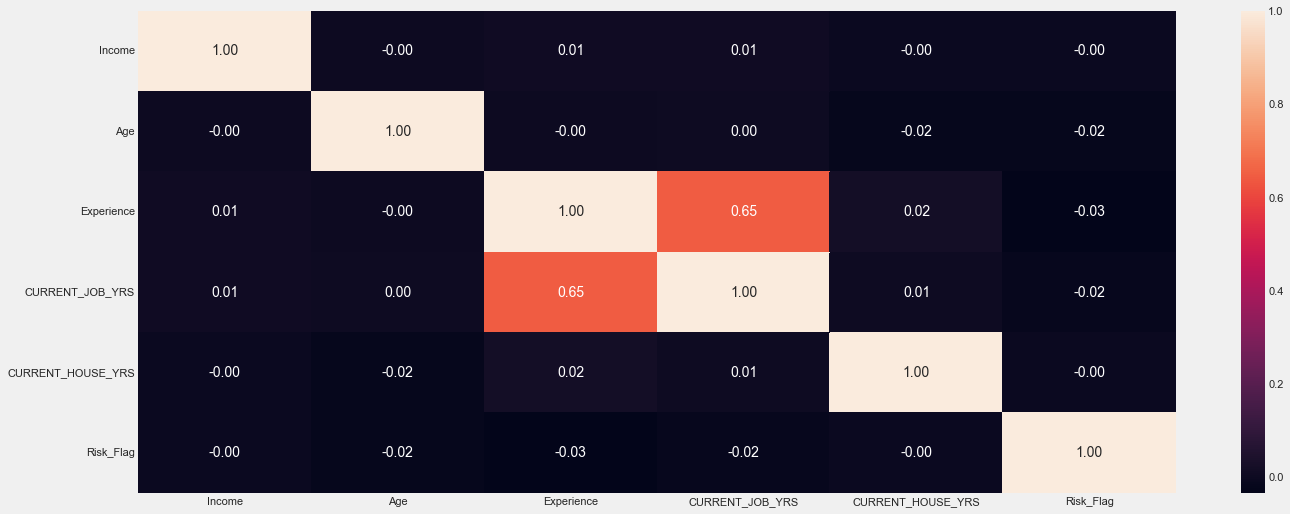

In [15]:
dataa = pd.read_csv('Training Data.csv')
dataa = dataa.drop(labels = ['Id'], axis = 1)
sns.heatmap(dataa.corr(), annot=True, fmt = ".2f")

Data Angka 

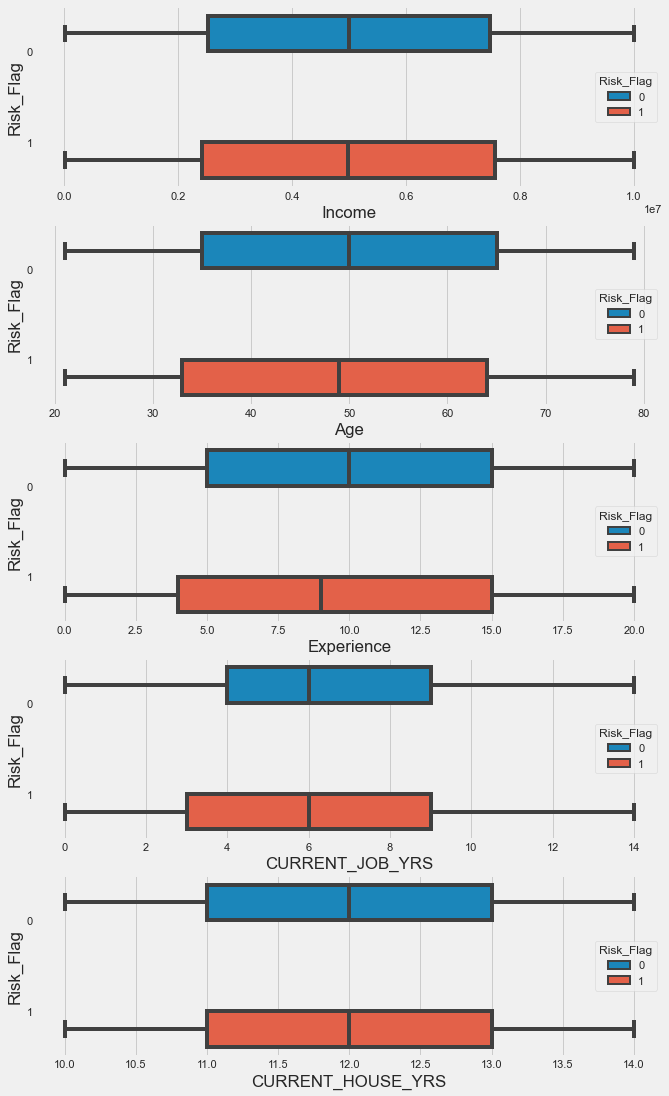

In [16]:
fig, axes = plt.subplots(5, 1, figsize =(10,18))
sns.boxplot(x='Income', y='Risk_Flag', data=data, orient='h', hue='Risk_Flag', ax=axes[0])
sns.boxplot(x='Age', y='Risk_Flag', data=data, orient="h", hue='Risk_Flag', ax=axes[1])
sns.boxplot(x='Experience', y='Risk_Flag', data=data, orient="h", hue='Risk_Flag', ax=axes[2])
sns.boxplot(x='CURRENT_JOB_YRS', y='Risk_Flag', data=data, orient="h", hue='Risk_Flag', ax=axes[3])
sns.boxplot(x='CURRENT_HOUSE_YRS', y='Risk_Flag', data=data, orient="h", hue='Risk_Flag', ax=axes[4])

Data Non Angka (Married/Single)

,Married/Single,Risk_Flag,jumlah,jumlah_orang
2,single,0,197912,226272
3,single,1,28360,226272
0,married,0,23092,25728
1,married,1,2636,25728


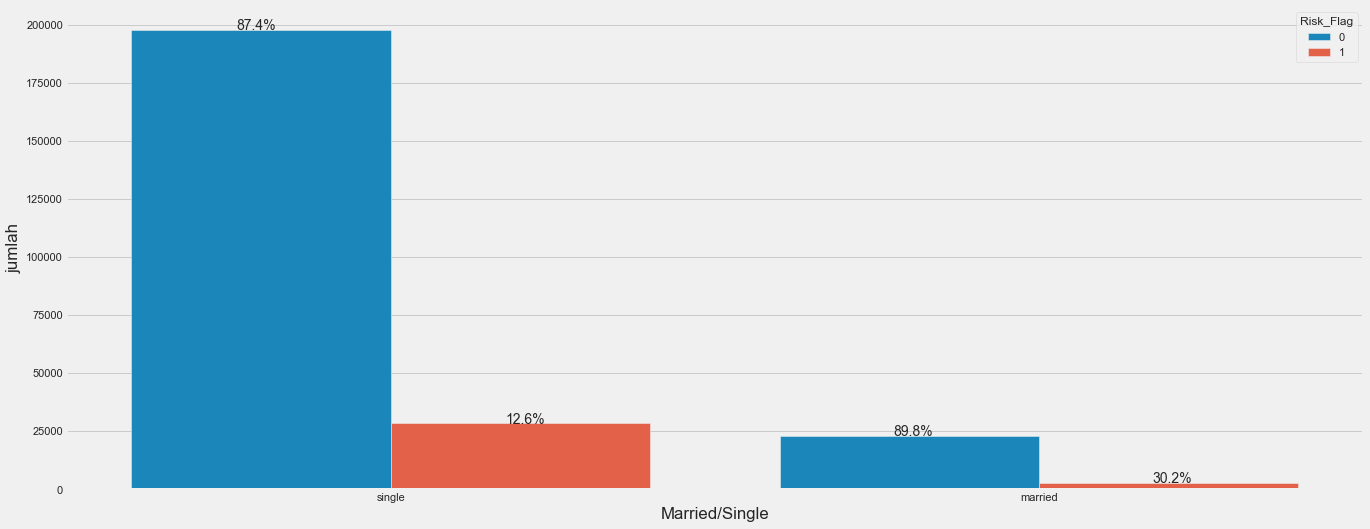

In [17]:
datana_multiv = pd.read_csv('Training Data.csv')

ms1 = datana_multiv.groupby(['Married/Single', 'Risk_Flag']).agg({'Married/Single': ['count']}).reset_index()
ms1.columns = ['Married/Single', 'Risk_Flag', 'jumlah']
ms1['jumlah_orang'] = ms1.groupby(['Married/Single'])['jumlah'].transform(sum)
ms = ms1.sort_values('jumlah_orang', ascending=False)
sns.barplot(x='Married/Single', y='jumlah', data=ms, hue='Risk_Flag')
plt.text(x=-0.2375, y = 197913, s= '87.4%')
plt.text(x=0.1775, y = 28361, s= '12.6%')
plt.text(x=0.775, y = 23093, s= '89.8%')
plt.text(x=1.175, y = 2637, s= '30.2%')
ms

Data Non Angka (House Owner)

,House_Ownership,Risk_Flag,jumlah,jumlah_orang
4,rented,0,202777,231898
5,rented,1,29121,231898
2,owned,0,11758,12918
3,owned,1,1160,12918
0,norent_noown,0,6469,7184
1,norent_noown,1,715,7184


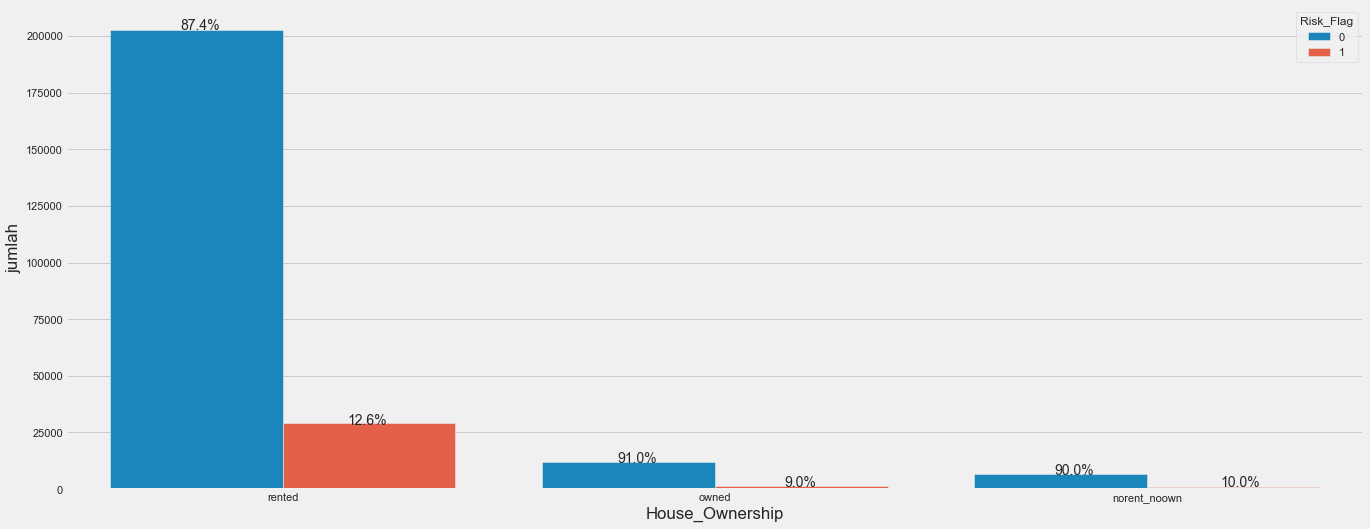

In [18]:
ho1 = datana_multiv.groupby(['House_Ownership', 'Risk_Flag']).agg({'House_Ownership': ['count']}).reset_index()
ho1.columns = ['House_Ownership', 'Risk_Flag', 'jumlah']
ho1['jumlah_orang'] = ho1.groupby(['House_Ownership'])['jumlah'].transform(sum)
ho = ho1.sort_values('jumlah_orang', ascending=False)
sns.barplot(x='House_Ownership', y='jumlah', data=ho, hue='Risk_Flag')
plt.text(x=-0.2375, y = 202778, s= '87.4%')
plt.text(x=0.15, y = 28361, s= '12.6%')
plt.text(x=0.775, y = 11759, s= '91.0%')
plt.text(x=1.16, y = 1161, s= '9.0%')
plt.text(x=1.785, y = 6470, s= '90.0%')
plt.text(x=2.17, y = 1161, s= '10.0%')
ho

Data Non Angka (Car Ownership)

,Car_Ownership,Risk_Flag,jumlah,jumlah_orang
0,no,0,153439,176000
1,no,1,22561,176000
2,yes,0,67565,76000
3,yes,1,8435,76000


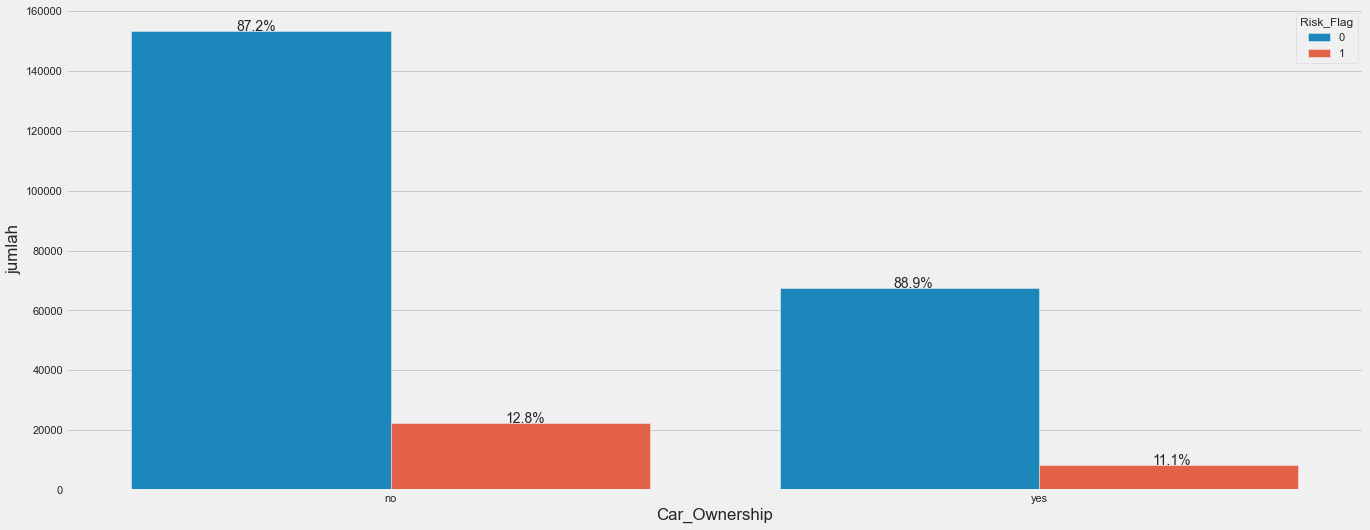

In [19]:
co1 = datana_multiv.groupby(['Car_Ownership', 'Risk_Flag']).agg({'Car_Ownership': ['count']}).reset_index()
co1.columns = ['Car_Ownership', 'Risk_Flag', 'jumlah']
co1['jumlah_orang'] = co1.groupby(['Car_Ownership'])['jumlah'].transform(sum)
co = co1.sort_values('jumlah_orang', ascending=False)
sns.barplot(x='Car_Ownership', y='jumlah', data=co, hue='Risk_Flag')
plt.text(x=-0.2375, y = 153440, s= '87.2%')
plt.text(x=0.1775, y = 22562, s= '12.8%')
plt.text(x=0.775, y = 67566, s= '88.9%')
plt.text(x=1.175, y = 8436, s= '11.1%')
co

Data Non Angka (Profession)

,Profession,Risk_Flag,jumlah,jumlah_orang
74,Physician,0,5247,5957
75,Physician,1,710,5957
88,Statistician,0,5135,5806
89,Statistician,1,671,5806
101,Web_designer,1,589,5397
100,Web_designer,0,4808,5397
81,Psychologist,1,657,5390
80,Psychologist,0,4733,5390
26,Computer_hardware_engineer,0,4682,5372
27,Computer_hardware_engineer,1,690,5372


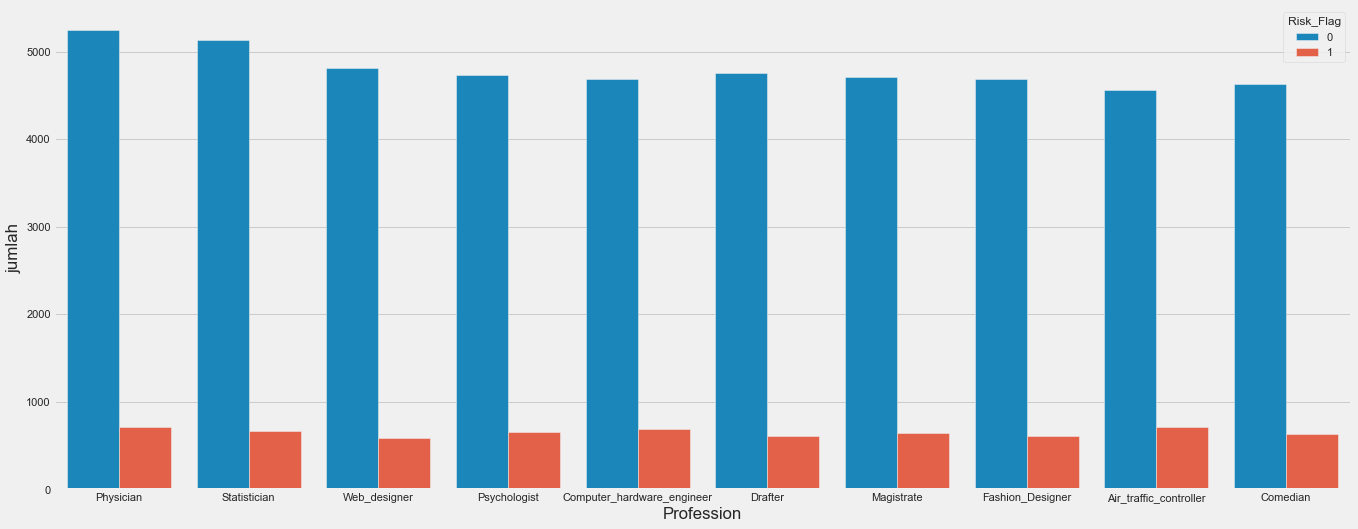

In [20]:
p1 = datana_multiv.groupby(['Profession', 'Risk_Flag']).agg({'Profession': ['count']}).reset_index()
p1.columns = ['Profession', 'Risk_Flag', 'jumlah']
p1['jumlah_orang'] = p1.groupby(['Profession'])['jumlah'].transform(sum)
p = p1.sort_values('jumlah_orang', ascending=False).head(20)
sns.barplot(x='Profession', y='jumlah', data=p, hue='Risk_Flag')
p


Data Non Angka (City)

,CITY,Risk_Flag,jumlah,jumlah_orang
625,Vijayanagaram,1,149,1259
624,Vijayanagaram,0,1110,1259
107,Bhopal,1,166,1208
106,Bhopal,0,1042,1208
128,Bulandshahr,0,1061,1185
129,Bulandshahr,1,124,1185
512,Saharsa[29],0,1067,1180
513,Saharsa[29],1,113,1180
626,Vijayawada,0,1025,1172
627,Vijayawada,1,147,1172


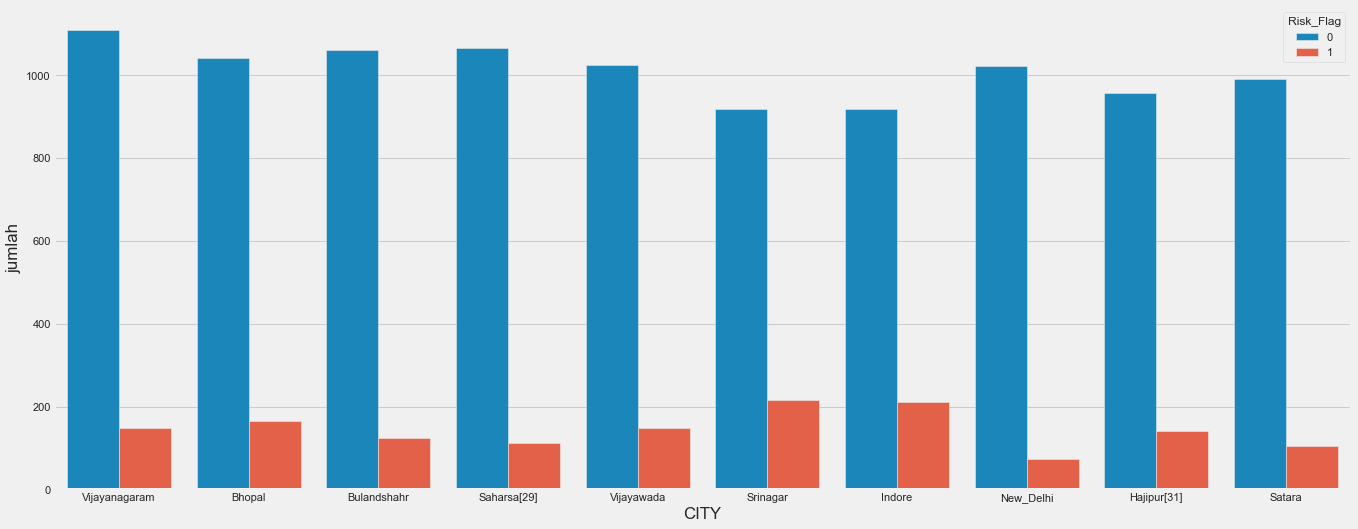

In [21]:
c1 = datana_multiv.groupby(['CITY', 'Risk_Flag']).agg({'CITY': ['count']}).reset_index()
c1.columns = ['CITY', 'Risk_Flag', 'jumlah']
c1['jumlah_orang'] = c1.groupby(['CITY'])['jumlah'].transform(sum)
c = c1.sort_values('jumlah_orang', ascending=False).head(20)
sns.barplot(x='CITY', y='jumlah', data=c, hue='Risk_Flag')
c

Data Non Angka (State)

,STATE,Risk_Flag,jumlah,jumlah_orang
51,Uttar_Pradesh,1,3343,28400
50,Uttar_Pradesh,0,25057,28400
29,Maharashtra,1,2895,25562
28,Maharashtra,0,22667,25562
1,Andhra_Pradesh,1,2935,25297
0,Andhra_Pradesh,0,22362,25297
57,West_Bengal,1,3009,23483
56,West_Bengal,0,20474,23483
4,Bihar,0,17197,19780
5,Bihar,1,2583,19780


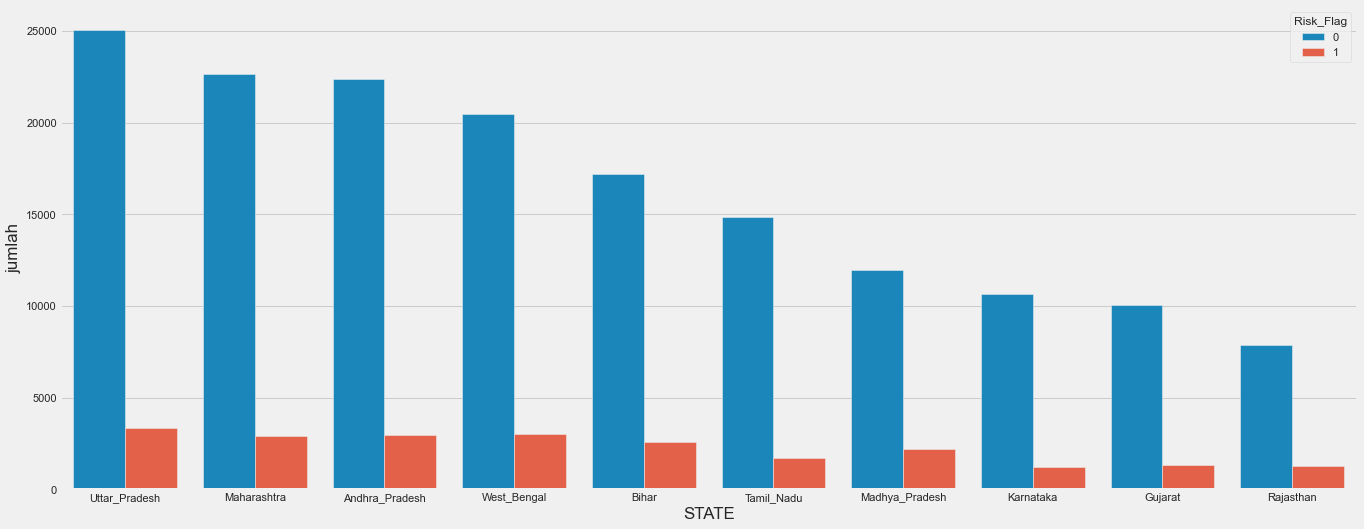

In [22]:
s1 = datana_multiv.groupby(['STATE', 'Risk_Flag']).agg({'STATE': ['count']}).reset_index()
s1.columns = ['STATE', 'Risk_Flag', 'jumlah']
s1['jumlah_orang'] = s1.groupby(['STATE'])['jumlah'].transform(sum)
s = s1.sort_values('jumlah_orang', ascending=False).head(20)
sns.barplot(x='STATE', y='jumlah', data=s, hue='Risk_Flag')
s

Data Pre-Processing

In [23]:
data_pre = data

Duplicate Values

In [24]:
data.duplicated().sum()

0

Feature Encoding (kami hanya menggunakan feature encoding di bagian state dan job dengan alasan: 
1. Kolom city terlalu banyak jadi berfokus di state yang dimana lebih disortir lagi berdasarkan peta India.
2. Kolom profession terlalu banyak jadi disortir kembali berdasarkan trained, educated, dan non job type.)

In [25]:
#Simplifikasi dari kolom profesi.
data_pre['Profession'].replace('Air_traffic_controller','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Analyst','Professionals', inplace=True)
data_pre['Profession'].replace('Architect','Professionals', inplace=True)
data_pre['Profession'].replace('Army_officer','Armed forces', inplace=True)
data_pre['Profession'].replace('Artist','Professionals', inplace=True)
data_pre['Profession'].replace('Aviator','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Biomedical_Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Chartered_Accountant','Professionals', inplace=True)
data_pre['Profession'].replace('Chef','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Chemical_engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Civil_engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Civil_servant','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Comedian','Professionals', inplace=True)
data_pre['Profession'].replace('Computer_hardware_engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Computer_operator','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Consultant','Professionals', inplace=True)
data_pre['Profession'].replace('Dentist','Professionals', inplace=True)
data_pre['Profession'].replace('Design_Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Designer','Professionals', inplace=True)
data_pre['Profession'].replace('Drafter','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Economist','Professionals', inplace=True)
data_pre['Profession'].replace('Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Fashion_Designer','Professionals', inplace=True)
data_pre['Profession'].replace('Financial_Analyst','Professionals', inplace=True)
data_pre['Profession'].replace('Firefighter','Service and sales workers', inplace=True)
data_pre['Profession'].replace('Flight_attendant','Service and sales workers', inplace=True)
data_pre['Profession'].replace('Geologist','Professionals', inplace=True)
data_pre['Profession'].replace('Graphic_Designer','Professionals', inplace=True)
data_pre['Profession'].replace('Hotel_Manager','Managers', inplace=True)
data_pre['Profession'].replace('Industrial_Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Lawyer','Professionals', inplace=True)
data_pre['Profession'].replace('Librarian','Professionals', inplace=True)
data_pre['Profession'].replace('Magistrate','Professionals', inplace=True)
data_pre['Profession'].replace('Mechanical_engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Microbiologist','Professionals', inplace=True)
data_pre['Profession'].replace('Official','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Petroleum_Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Physician','Professionals', inplace=True)
data_pre['Profession'].replace('Police_officer','Service and sales workers', inplace=True)
data_pre['Profession'].replace('Politician','Professionals', inplace=True)
data_pre['Profession'].replace('Psychologist','Professionals', inplace=True)
data_pre['Profession'].replace('Scientist','Professionals', inplace=True)
data_pre['Profession'].replace('Secretary','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Software_Developer','Professionals', inplace=True)
data_pre['Profession'].replace('Statistician','Professionals', inplace=True)
data_pre['Profession'].replace('Surgeon','Professionals', inplace=True)
data_pre['Profession'].replace('Surveyor','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Technical_writer','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Technician','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Technology_specialist','Professionals', inplace=True)
data_pre['Profession'].replace('Web_designer','Professionals', inplace=True)

#Simplifikasi dari kolom State
data_pre['STATE'].replace('Andhra_Pradesh','South', inplace=True)
data_pre['STATE'].replace('Assam','North', inplace=True)
data_pre['STATE'].replace('Bihar','East', inplace=True)
data_pre['STATE'].replace('Chandigarh','North', inplace=True)
data_pre['STATE'].replace('Chhattisgarh','Central', inplace=True)
data_pre['STATE'].replace('Delhi','North', inplace=True)
data_pre['STATE'].replace('Gujarat','West', inplace=True)
data_pre['STATE'].replace('Haryana','North', inplace=True)
data_pre['STATE'].replace('Himachal_Pradesh','North', inplace=True)
data_pre['STATE'].replace('Jammu_and_Kashmir','North', inplace=True)
data_pre['STATE'].replace('Jharkhand','East', inplace=True)
data_pre['STATE'].replace('Karnataka','South', inplace=True)
data_pre['STATE'].replace('Kerala','South', inplace=True)
data_pre['STATE'].replace('Madhya_Pradesh','Central', inplace=True)
data_pre['STATE'].replace('Maharashtra','West', inplace=True)
data_pre['STATE'].replace('Manipur','North', inplace=True)
data_pre['STATE'].replace('Mizoram','North', inplace=True)
data_pre['STATE'].replace('Odisha','East', inplace=True)
data_pre['STATE'].replace('Puducherry','South', inplace=True)
data_pre['STATE'].replace('Punjab','North', inplace=True)
data_pre['STATE'].replace('Rajasthan','North', inplace=True)
data_pre['STATE'].replace('Sikkim','North', inplace=True)
data_pre['STATE'].replace('Tamil_Nadu','South', inplace=True)
data_pre['STATE'].replace('Telangana','South', inplace=True)
data_pre['STATE'].replace('Tripura','North', inplace=True)
data_pre['STATE'].replace('Uttar_Pradesh','North', inplace=True)
data_pre['STATE'].replace('Uttar_Pradesh[5]','North', inplace=True)
data_pre['STATE'].replace('Uttarakhand','North', inplace=True)
data_pre['STATE'].replace('West_Bengal','East', inplace=True)

In [26]:
dummies_category1 = pd.get_dummies(data_pre['Profession'],prefix='Profession')
dummies_category2 = pd.get_dummies(data_pre['STATE'],prefix='STATE')
dummies_category3 = pd.get_dummies(data_pre['Married/Single'],prefix='Married/Single')
dummies_category4 = pd.get_dummies(data_pre['House_Ownership'],prefix='House_Ownership')
dummies_category5 = pd.get_dummies(data_pre['Car_Ownership'],prefix='Car_Ownership')
data_pre = pd.concat([data_pre, dummies_category1, dummies_category2, dummies_category3, dummies_category4, dummies_category5], axis=1)
data_pre = data_pre.drop(['Id', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], axis=1)
data_pre


,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Armed forces,Profession_Managers,Profession_Professionals,Profession_Service and sales workers,...,STATE_North,STATE_South,STATE_West,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes
0,1303834,23,3,3,13,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
1,7574516,40,10,9,13,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
2,3991815,66,4,4,10,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
3,6256451,41,2,2,12,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
4,5768871,47,11,3,14,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
251996,2843572,26,10,6,11,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
251997,4522448,46,7,7,12,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
251998,6507128,45,0,0,10,0,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0


Standardiation/Normalization

In [27]:
risk = data_pre['Risk_Flag']
nonrisk = data_pre.drop(labels = ['Risk_Flag'], axis = 1)
normalisasi = StandardScaler().fit_transform(nonrisk)
normalisasi_data = pd.DataFrame(normalisasi, columns=list(nonrisk))
normalisasi_data

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_Armed forces,Profession_Managers,Profession_Professionals,Profession_Service and sales workers,Profession_Technicians and associate professionals,...,STATE_North,STATE_South,STATE_West,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356,-0.137276,-0.14484,0.668701,-0.248622,-0.518274,...,-0.630839,-0.610680,-0.414644,-0.337200,0.337200,-0.171302,-0.232447,0.294423,0.657129,-0.657129
1,0.895457,-0.583344,-0.014067,0.731036,0.716356,-0.137276,-0.14484,0.668701,-0.248622,-0.518274,...,-0.630839,-0.610680,2.411708,-0.337200,0.337200,-0.171302,-0.232447,0.294423,0.657129,-0.657129
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981,-0.137276,-0.14484,-1.495436,-0.248622,1.929483,...,-0.630839,1.637518,-0.414644,2.965599,-2.965599,-0.171302,-0.232447,0.294423,0.657129,-0.657129
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577,-0.137276,-0.14484,0.668701,-0.248622,-0.518274,...,-0.630839,-0.610680,-0.414644,-0.337200,0.337200,-0.171302,-0.232447,0.294423,-1.521772,1.521772
4,0.268128,-0.173119,0.152528,-0.914131,1.431135,-0.137276,-0.14484,-1.495436,-0.248622,1.929483,...,-0.630839,1.637518,-0.414644,-0.337200,0.337200,-0.171302,-0.232447,0.294423,0.657129,-0.657129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,1.097092,-0.407533,0.485719,-0.091547,-0.713202,-0.137276,-0.14484,0.668701,-0.248622,-0.518274,...,-0.630839,-0.610680,-0.414644,-0.337200,0.337200,-0.171302,-0.232447,0.294423,0.657129,-0.657129
251996,-0.748199,-1.403793,-0.014067,-0.091547,-0.713202,7.284617,-0.14484,-1.495436,-0.248622,-0.518274,...,-0.630839,-0.610680,-0.414644,-0.337200,0.337200,-0.171302,-0.232447,0.294423,0.657129,-0.657129
251997,-0.164913,-0.231723,-0.513852,0.182647,0.001577,-0.137276,-0.14484,0.668701,-0.248622,-0.518274,...,-0.630839,-0.610680,2.411708,-0.337200,0.337200,-0.171302,-0.232447,0.294423,0.657129,-0.657129
251998,0.524618,-0.290326,-1.680018,-1.736714,-1.427981,-0.137276,-0.14484,0.668701,-0.248622,-0.518274,...,-0.630839,1.637518,-0.414644,-0.337200,0.337200,-0.171302,-0.232447,0.294423,0.657129,-0.657129


Class Imbalance

,hasil,jumlah
0,0,221004
1,1,30996


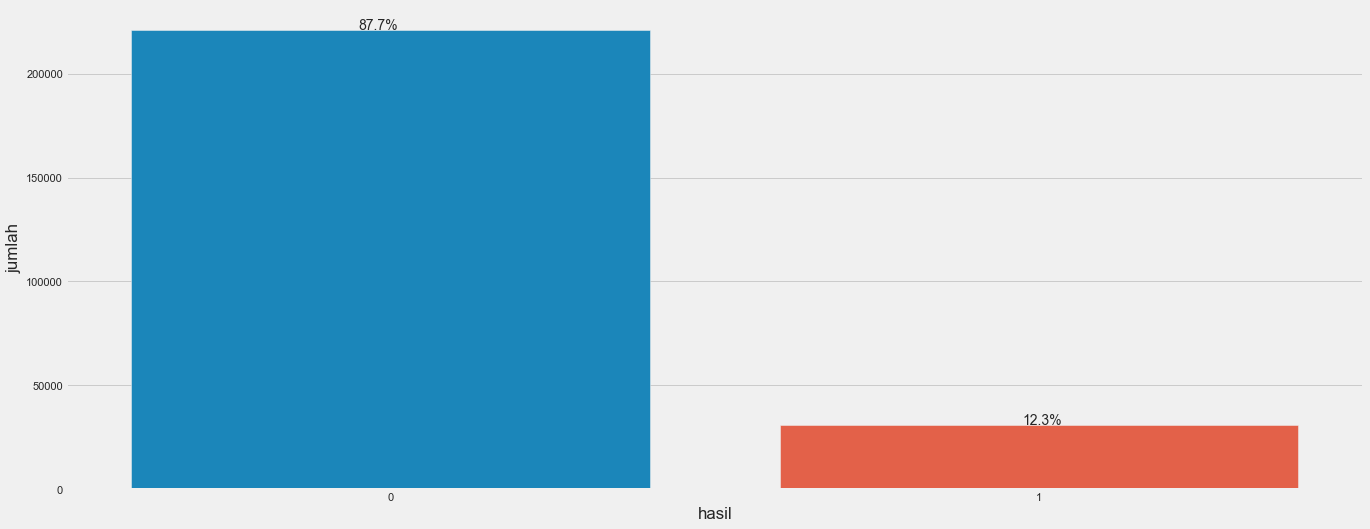

In [28]:
tabeljumlahrisk = data_pre.groupby(['Risk_Flag']).agg({'Risk_Flag': ['count']}).reset_index()
tabeljumlahrisk.columns = ['hasil', 'jumlah']
sns.barplot(x = 'hasil', y = 'jumlah', data=tabeljumlahrisk)
plt.text(x=-0.05, y = 221005, s= '87.7%')
plt.text(x=0.975, y = 30997, s= '12.3%')
tabeljumlahrisk

In [29]:
nonrisk_over_smote, risk_over_smote = over_sampling.SMOTE().fit_resample(nonrisk, risk)
data_smote = pd.concat([nonrisk_over_smote, risk_over_smote], axis=1)
data_smote = data_smote.drop_duplicates()

,hasil,jumlah
0,0,34747
1,1,52463


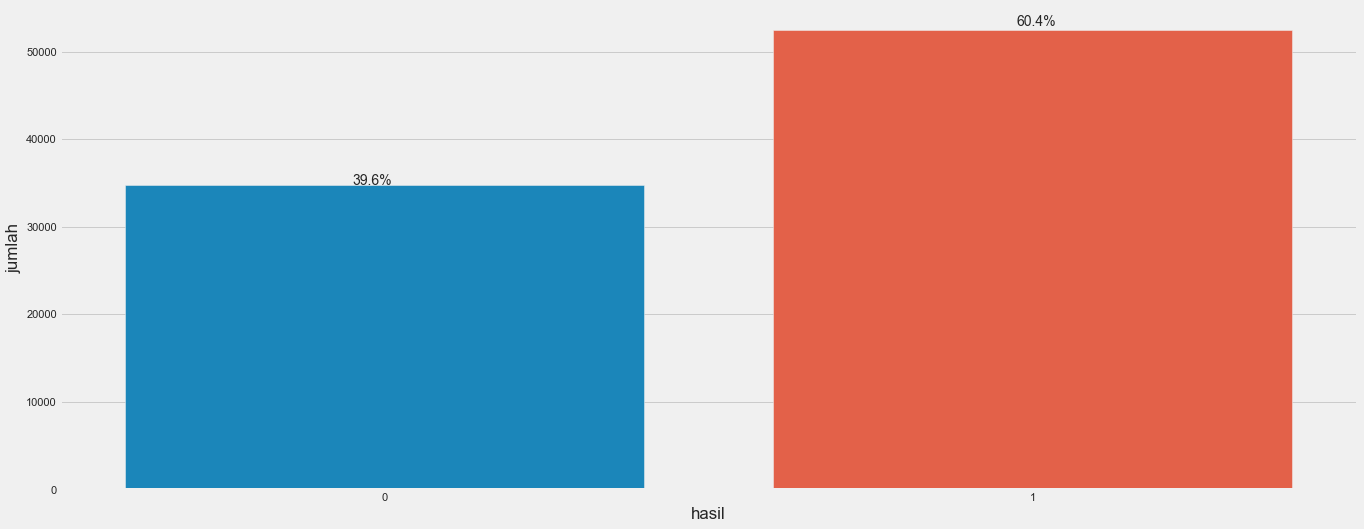

In [30]:
smotedata = data_smote.groupby(['Risk_Flag']).agg({'Risk_Flag': ['count']}).reset_index()
smotedata.columns = ['hasil', 'jumlah']
sns.barplot(x = 'hasil', y = 'jumlah', data=smotedata)
plt.text(x=-0.05, y = 34748, s= '39.6%')
plt.text(x=0.975, y = 52906, s= '60.4%')
smotedata

In [31]:
data_smote

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_Armed forces,Profession_Managers,Profession_Professionals,Profession_Service and sales workers,Profession_Technicians and associate professionals,...,STATE_South,STATE_West,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes,Risk_Flag
0,1303834,23,3,3,13,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
1,7574516,40,10,9,13,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
2,3991815,66,4,4,10,0,0,0,0,1,...,1,0,1,0,0,0,1,1,0,0
3,6256451,41,2,2,12,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
4,5768871,47,11,3,14,0,0,0,0,1,...,1,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441987,974378,44,2,2,11,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
441991,3592015,24,14,10,12,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
442004,5825326,48,2,2,12,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
442005,2516948,56,3,2,12,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


Multivariate (Grouped)

Heatmap

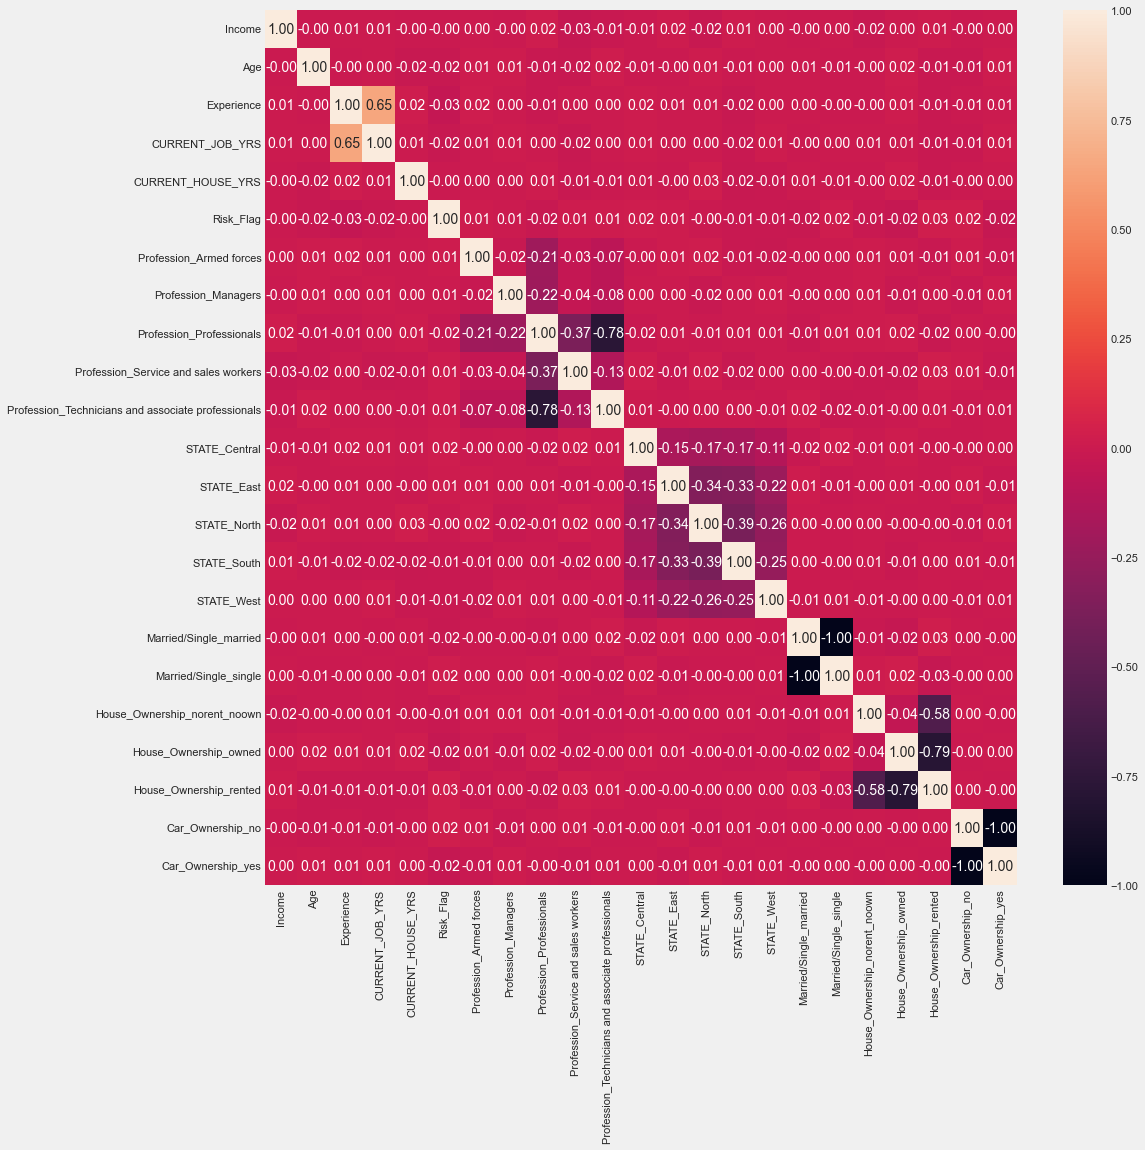

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_pre.corr(), annot=True, fmt = ".2f")

Data Non Angka (Profession)

Data Asli

In [33]:
data_hahahihi = data
#Simplifikasi dari kolom profesi.
data_hahahihi['Profession'].replace('Air_traffic_controller','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Analyst','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Architect','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Army_officer','Armed forces', inplace=True)
data_hahahihi['Profession'].replace('Artist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Aviator','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Biomedical_Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Chartered_Accountant','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Chef','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Chemical_engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Civil_engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Civil_servant','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Comedian','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Computer_hardware_engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Computer_operator','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Consultant','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Dentist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Design_Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Designer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Drafter','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Economist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Fashion_Designer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Financial_Analyst','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Firefighter','Service and sales workers', inplace=True)
data_hahahihi['Profession'].replace('Flight_attendant','Service and sales workers', inplace=True)
data_hahahihi['Profession'].replace('Geologist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Graphic_Designer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Hotel_Manager','Managers', inplace=True)
data_hahahihi['Profession'].replace('Industrial_Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Lawyer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Librarian','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Magistrate','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Mechanical_engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Microbiologist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Official','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Petroleum_Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Physician','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Police_officer','Service and sales workers', inplace=True)
data_hahahihi['Profession'].replace('Politician','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Psychologist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Scientist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Secretary','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Software_Developer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Statistician','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Surgeon','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Surveyor','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Technical_writer','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Technician','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Technology_specialist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Web_designer','Professionals', inplace=True)


#Simplifikasi dari kolom State
data_hahahihi['STATE'].replace('Andhra_Pradesh','South', inplace=True)
data_hahahihi['STATE'].replace('Assam','North', inplace=True)
data_hahahihi['STATE'].replace('Bihar','East', inplace=True)
data_hahahihi['STATE'].replace('Chandigarh','North', inplace=True)
data_hahahihi['STATE'].replace('Chhattisgarh','Central', inplace=True)
data_hahahihi['STATE'].replace('Delhi','North', inplace=True)
data_hahahihi['STATE'].replace('Gujarat','West', inplace=True)
data_hahahihi['STATE'].replace('Haryana','North', inplace=True)
data_hahahihi['STATE'].replace('Himachal_Pradesh','North', inplace=True)
data_hahahihi['STATE'].replace('Jammu_and_Kashmir','North', inplace=True)
data_hahahihi['STATE'].replace('Jharkhand','East', inplace=True)
data_hahahihi['STATE'].replace('Karnataka','South', inplace=True)
data_hahahihi['STATE'].replace('Kerala','South', inplace=True)
data_hahahihi['STATE'].replace('Madhya_Pradesh','Central', inplace=True)
data_hahahihi['STATE'].replace('Maharashtra','West', inplace=True)
data_hahahihi['STATE'].replace('Manipur','North', inplace=True)
data_hahahihi['STATE'].replace('Mizoram','North', inplace=True)
data_hahahihi['STATE'].replace('Odisha','East', inplace=True)
data_hahahihi['STATE'].replace('Puducherry','South', inplace=True)
data_hahahihi['STATE'].replace('Punjab','North', inplace=True)
data_hahahihi['STATE'].replace('Rajasthan','North', inplace=True)
data_hahahihi['STATE'].replace('Sikkim','North', inplace=True)
data_hahahihi['STATE'].replace('Tamil_Nadu','South', inplace=True)
data_hahahihi['STATE'].replace('Telangana','South', inplace=True)
data_hahahihi['STATE'].replace('Tripura','North', inplace=True)
data_hahahihi['STATE'].replace('Uttar_Pradesh','North', inplace=True)
data_hahahihi['STATE'].replace('Uttar_Pradesh[5]','North', inplace=True)
data_hahahihi['STATE'].replace('Uttarakhand','North', inplace=True)
data_hahahihi['STATE'].replace('West_Bengal','East', inplace=True)
data_hahahihi

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Professionals,Rewa,Central,3,13,0
1,2,7574516,40,10,single,rented,no,Professionals,Parbhani,West,9,13,0
2,3,3991815,66,4,married,rented,no,Technicians and associate professionals,Alappuzha,South,4,10,0
3,4,6256451,41,2,single,rented,yes,Professionals,Bhubaneswar,East,2,12,1
4,5,5768871,47,11,single,rented,no,Technicians and associate professionals,Tiruchirappalli[10],South,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Professionals,Kolkata,East,6,11,0
251996,251997,2843572,26,10,single,rented,no,Armed forces,Rewa,Central,6,11,0
251997,251998,4522448,46,7,single,rented,no,Professionals,Kalyan-Dombivli,West,7,12,0
251998,251999,6507128,45,0,single,rented,no,Professionals,Pondicherry,South,0,10,0


Data Non Angka (Profession)

,profession,jumlah
2,Professionals,174134
4,Technicians and associate professionals,53357
3,Service and sales workers,14670
1,Managers,5178
0,Armed forces,4661


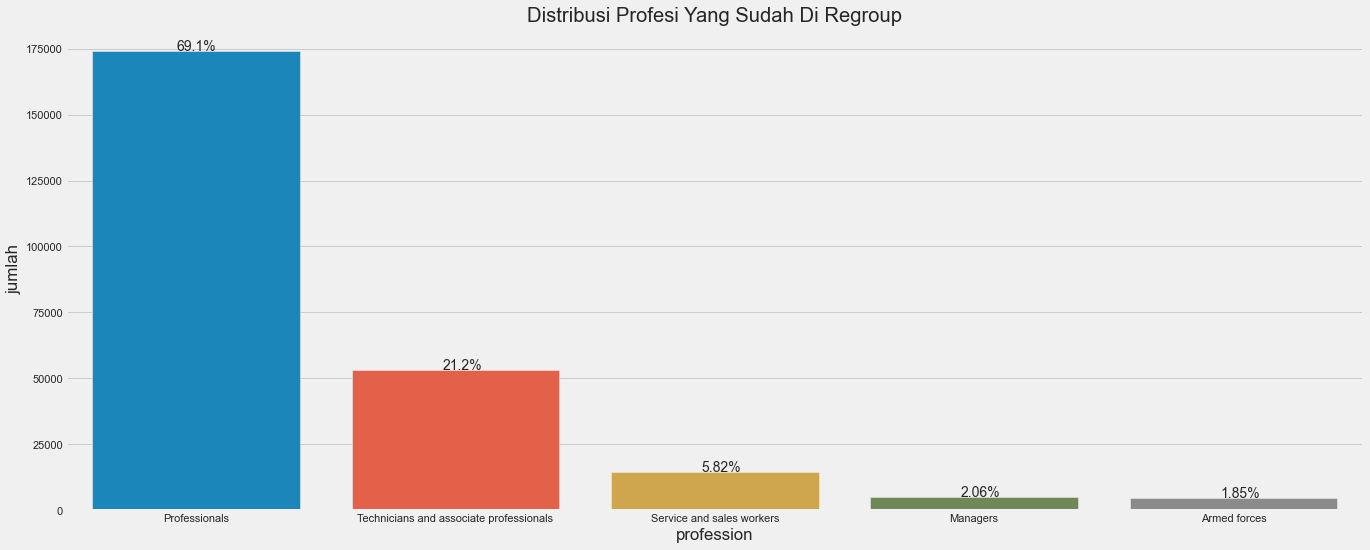

In [34]:
data_pg_profesi = data_hahahihi.groupby(['Profession']).agg({'Id': ['count']}).reset_index()
data_pg_profesi.columns = ['profession', 'jumlah']
data_pg_profesi = data_pg_profesi.sort_values('jumlah', ascending=False)
sns.barplot(x = 'profession', y = 'jumlah', data=data_pg_profesi)
plt.title('Distribusi Profesi Yang Sudah Di Regroup')
plt.text(x=-0.075, y = 174135, s= '69.1%')
plt.text(x=0.95, y = 53358, s= '21.2%')
plt.text(x=1.95, y = 14671, s= '5.82%')
plt.text(x=2.95, y = 5179, s= '2.06%')
plt.text(x=3.95, y = 4662, s= '1.85%')
data_pg_profesi

,Profession,Risk_Flag,jumlah,jumlah_orang
4,Professionals,0,153525,174134
5,Professionals,1,20609,174134
8,Technicians and associate professionals,0,46452,53357
9,Technicians and associate professionals,1,6905,53357
6,Service and sales workers,0,12598,14670
7,Service and sales workers,1,2072,14670
2,Managers,0,4477,5178
3,Managers,1,701,5178
0,Armed forces,0,3952,4661
1,Armed forces,1,709,4661


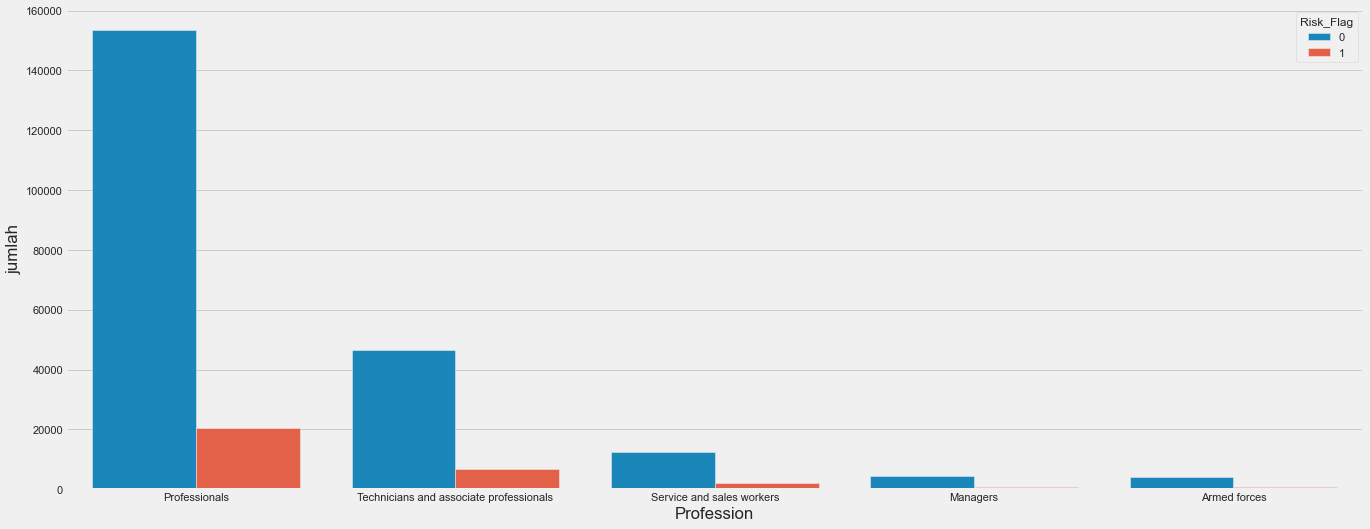

In [35]:
pg1 = data_hahahihi.groupby(['Profession', 'Risk_Flag']).agg({'Profession': ['count']}).reset_index()
pg1.columns = ['Profession', 'Risk_Flag', 'jumlah']
pg1['jumlah_orang'] = pg1.groupby(['Profession'])['jumlah'].transform(sum)
pg = pg1.sort_values('jumlah_orang', ascending=False).head(20)
sns.barplot(x='Profession', y='jumlah', data=pg, hue='Risk_Flag')
pg

Data Non Angka (State)

,state,jumlah
2,North,71737
3,South,68451
1,East,56886
4,West,36970
0,Central,17956


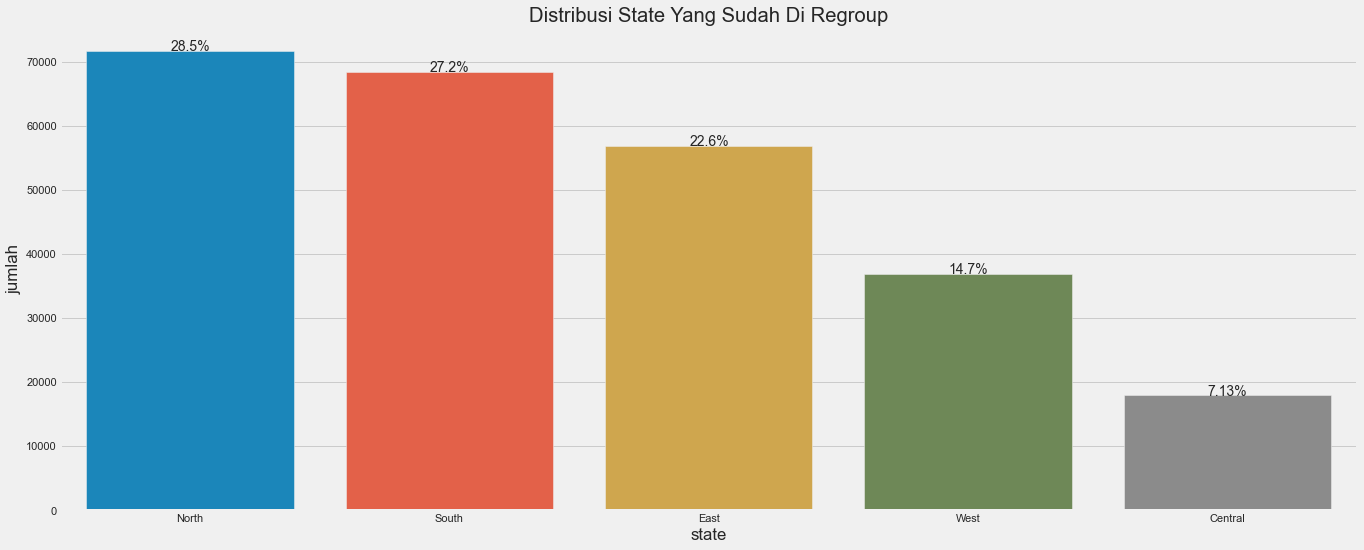

In [36]:
data_sg_profesi = data_hahahihi.groupby(['STATE']).agg({'Id': ['count']}).reset_index()
data_sg_profesi.columns = ['state', 'jumlah']
data_sg_profesi = data_sg_profesi.sort_values('jumlah', ascending=False)
sns.barplot(x = 'state', y = 'jumlah', data=data_sg_profesi)
plt.title('Distribusi State Yang Sudah Di Regroup')
plt.text(x=-0.075, y = 71737, s= '28.5%')
plt.text(x=0.925, y = 68451, s= '27.2%')
plt.text(x=1.925, y = 56886, s= '22.6%')
plt.text(x=2.925, y = 36970, s= '14.7%')
plt.text(x=3.925, y = 17956, s= '7.13%')
data_sg_profesi

,STATE,Risk_Flag,jumlah,jumlah_orang
4,North,0,63067,71737
5,North,1,8670,71737
6,South,0,60505,68451
7,South,1,7946,68451
2,East,0,49435,56886
3,East,1,7451,56886
8,West,0,32732,36970
9,West,1,4238,36970
0,Central,0,15265,17956
1,Central,1,2691,17956


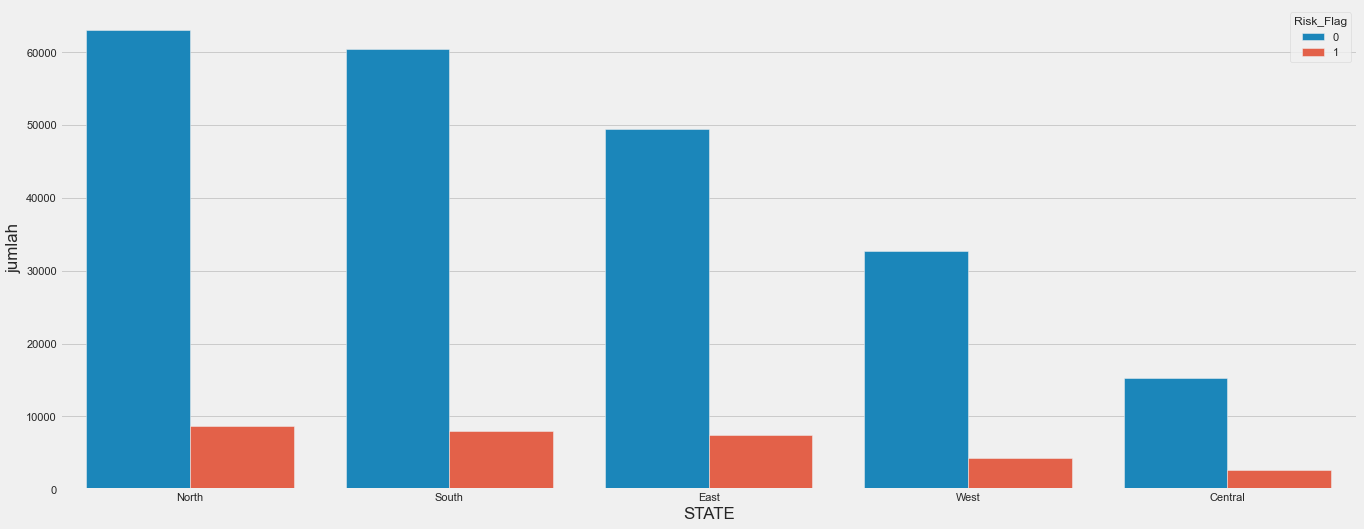

In [37]:
sg1 = data_hahahihi.groupby(['STATE', 'Risk_Flag']).agg({'Id': ['count']}).reset_index()
sg1.columns = ['STATE', 'Risk_Flag', 'jumlah']
sg1['jumlah_orang'] = sg1.groupby(['STATE'])['jumlah'].transform(sum)
sg = sg1.sort_values('jumlah_orang', ascending=False)
sns.barplot(x='STATE', y='jumlah', data=sg, hue='Risk_Flag')
sg

Model Learning

Fokus ke Normalisasi Data

In [58]:
x = normalisasi_data
y = risk

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [79]:
data_smote

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_Armed forces,Profession_Managers,Profession_Professionals,Profession_Service and sales workers,Profession_Technicians and associate professionals,...,STATE_South,STATE_West,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes,Risk_Flag
0,1303834,23,3,3,13,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
1,7574516,40,10,9,13,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
2,3991815,66,4,4,10,0,0,0,0,1,...,1,0,1,0,0,0,1,1,0,0
3,6256451,41,2,2,12,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
4,5768871,47,11,3,14,0,0,0,0,1,...,1,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441987,974378,44,2,2,11,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
441991,3592015,24,14,10,12,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
442004,5825326,48,2,2,12,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
442005,2516948,56,3,2,12,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [78]:
data_smote.to_csv('smote_dataset.csv')

In [39]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [40]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.show()
    
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

Logistic Regression

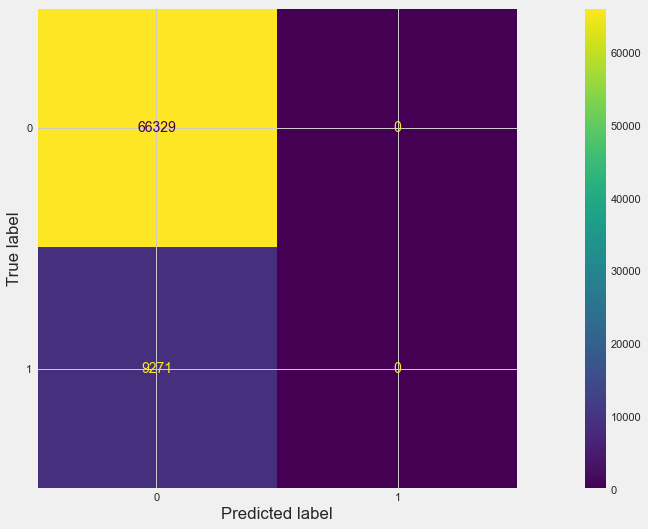



Accuracy:  0.8773677248677249
Precision:  0.0
Recall:  0.0
F1:  0.0
AUC:  0.5585332777609521


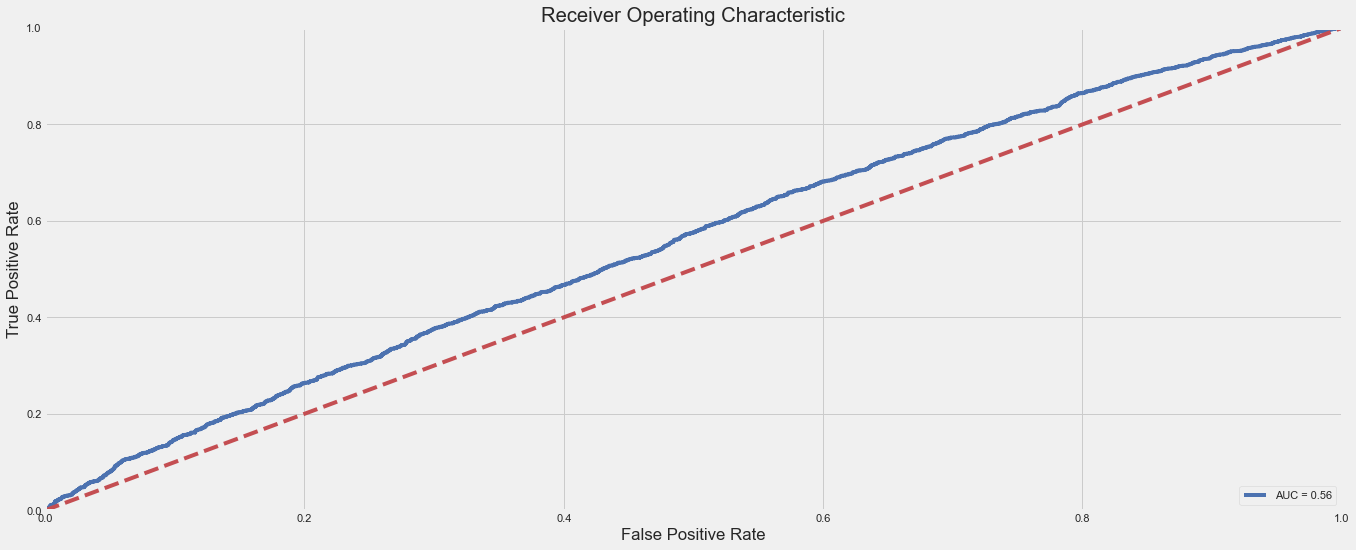

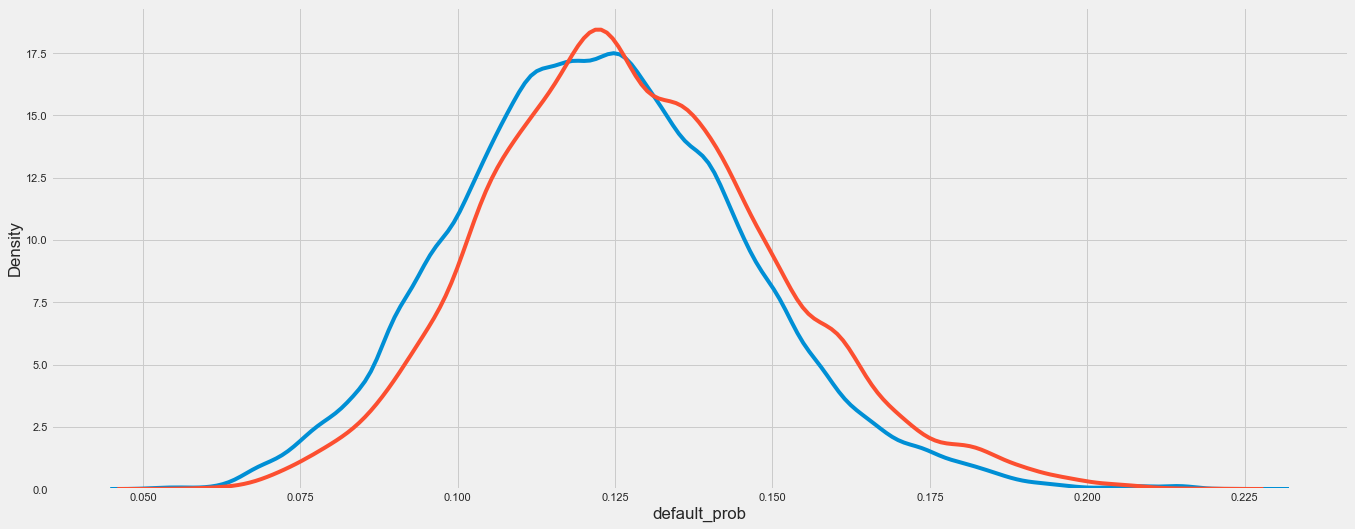

true_class  predicted_class
0           0                  1.0
1           0                  1.0
Name: predicted_class, dtype: float64


In [41]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
eval_model(logistic_model, x_test, y_test)

Rainbow Forest

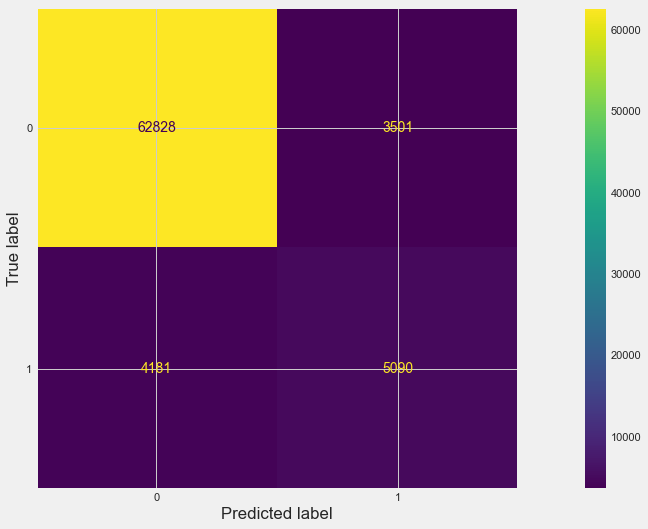



Accuracy:  0.8983862433862434
Precision:  0.5924805028518216
Recall:  0.5490238377737029
F1:  0.5699249804053297
AUC:  0.9365078025928867


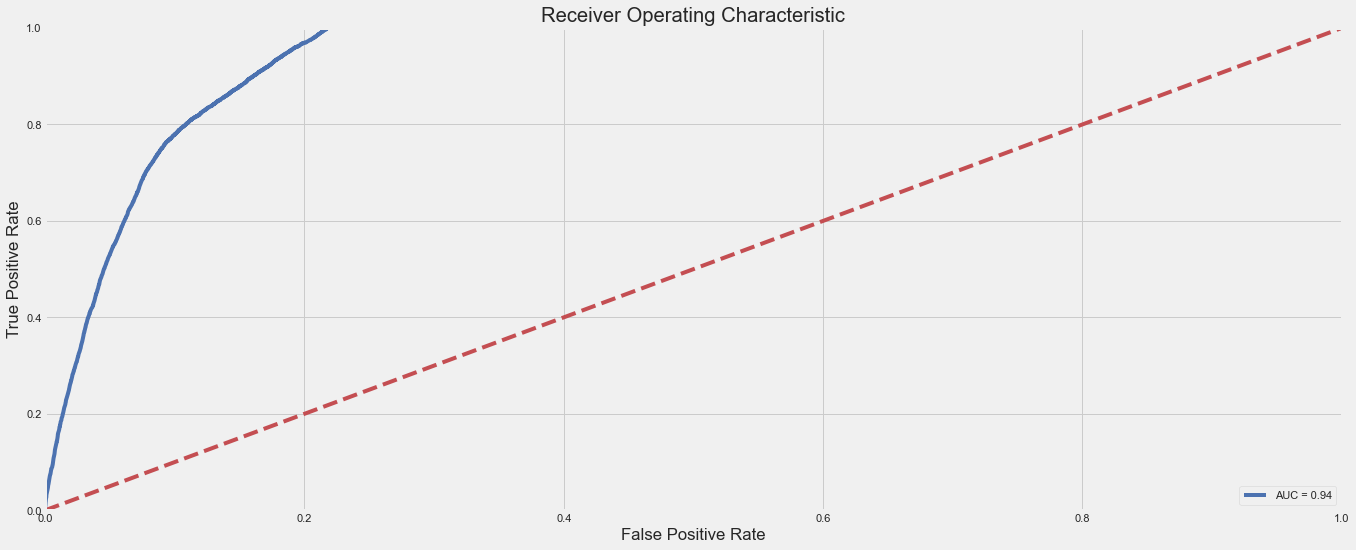

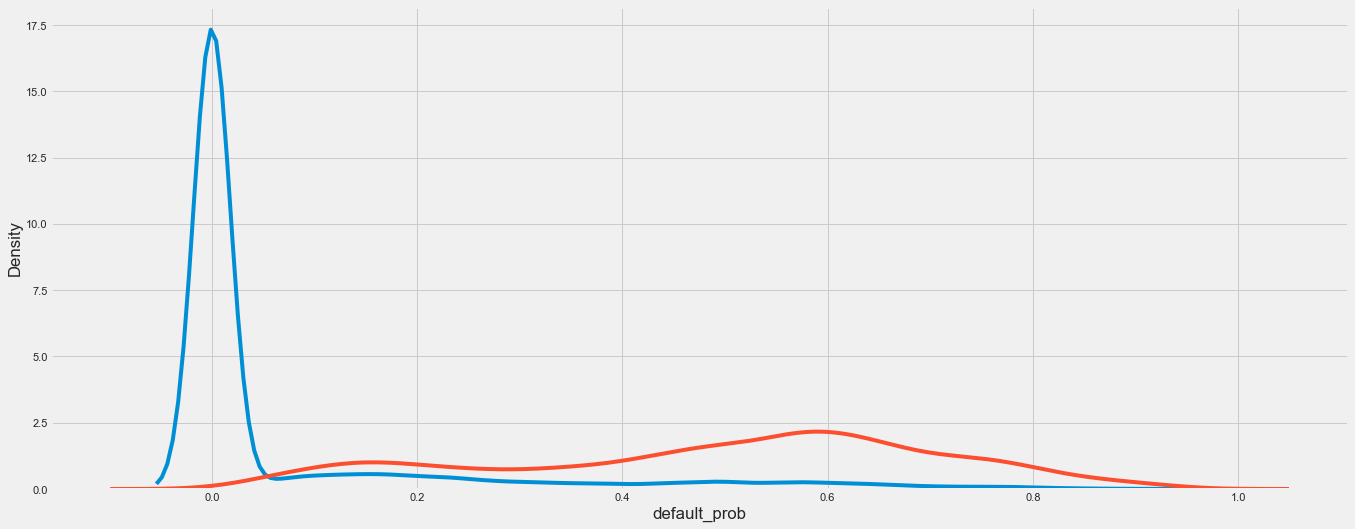

true_class  predicted_class
0           0                  0.947218
            1                  0.052782
1           1                  0.549024
            0                  0.450976
Name: predicted_class, dtype: float64


In [42]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

K-Neighborhood

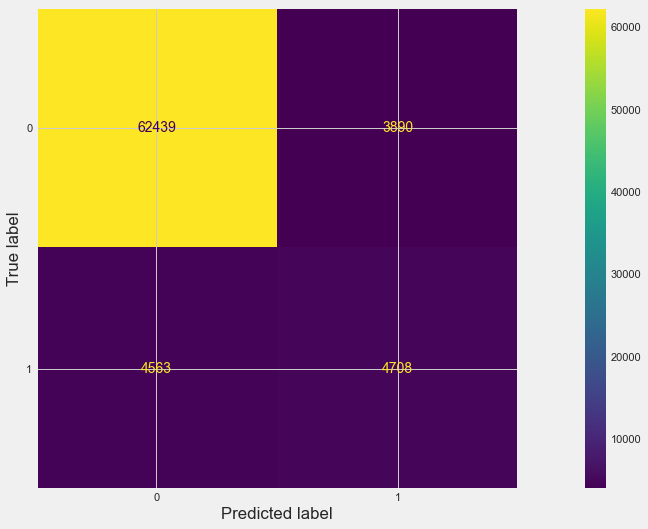



Accuracy:  0.8881878306878307
Precision:  0.5475692021400326
Recall:  0.5078200841333189
F1:  0.526946107784431
AUC:  0.8770349760811513


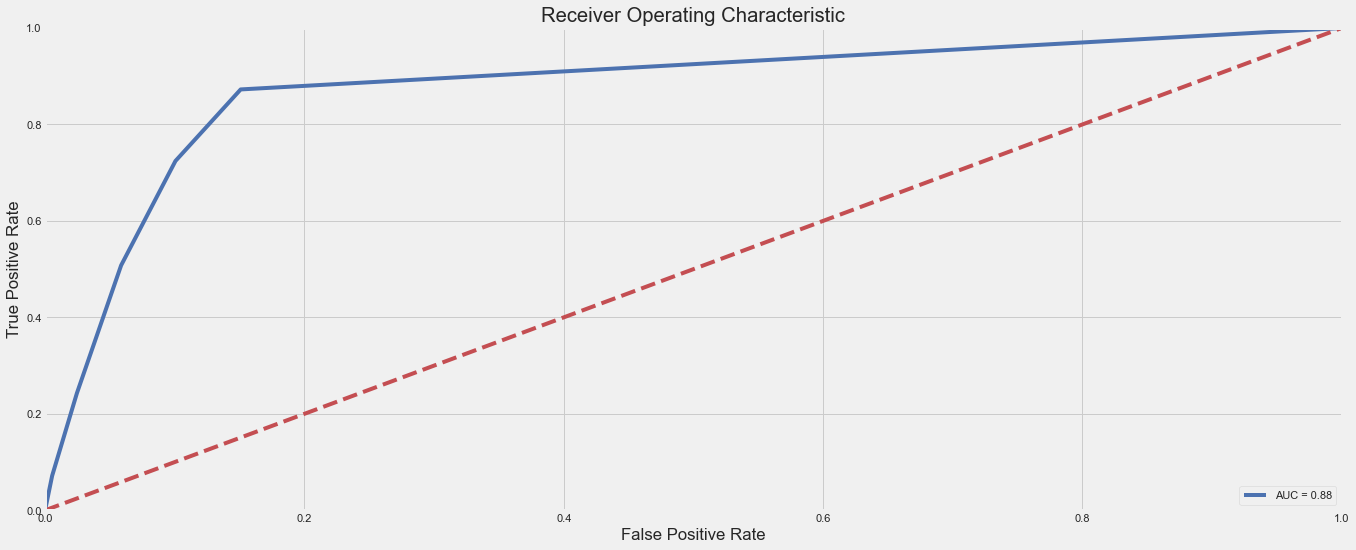

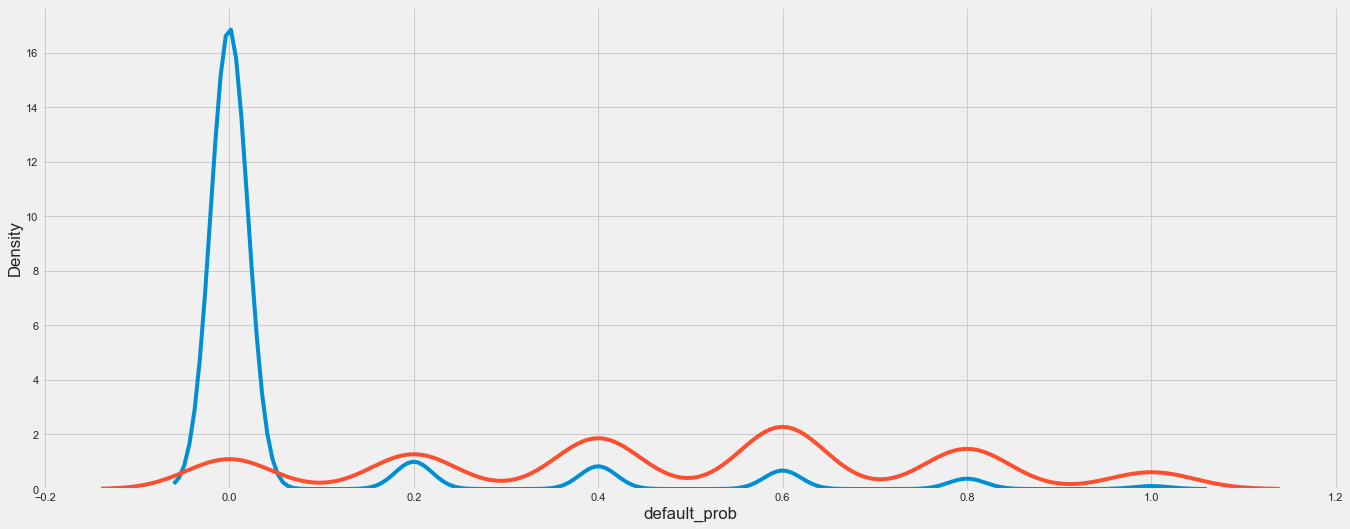

true_class  predicted_class
0           0                  0.941353
            1                  0.058647
1           1                  0.507820
            0                  0.492180
Name: predicted_class, dtype: float64


In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
eval_model(knn, x_test, y_test)

Decision Tree

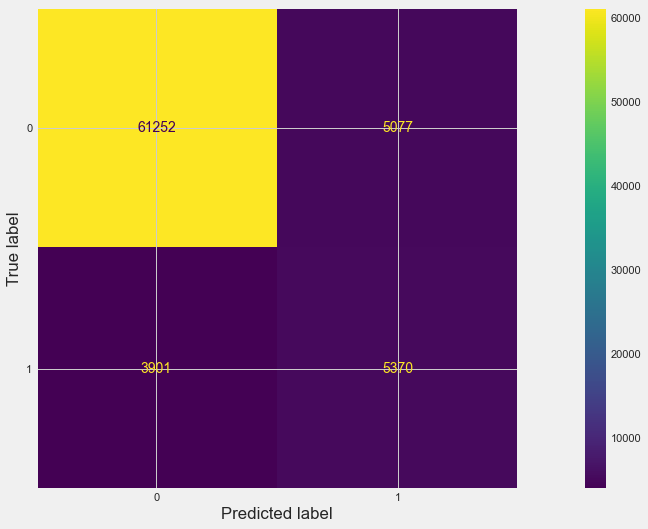



Accuracy:  0.8812433862433863
Precision:  0.5140231645448454
Recall:  0.5792255420127279
F1:  0.5446799878283802
AUC:  0.851158026470842


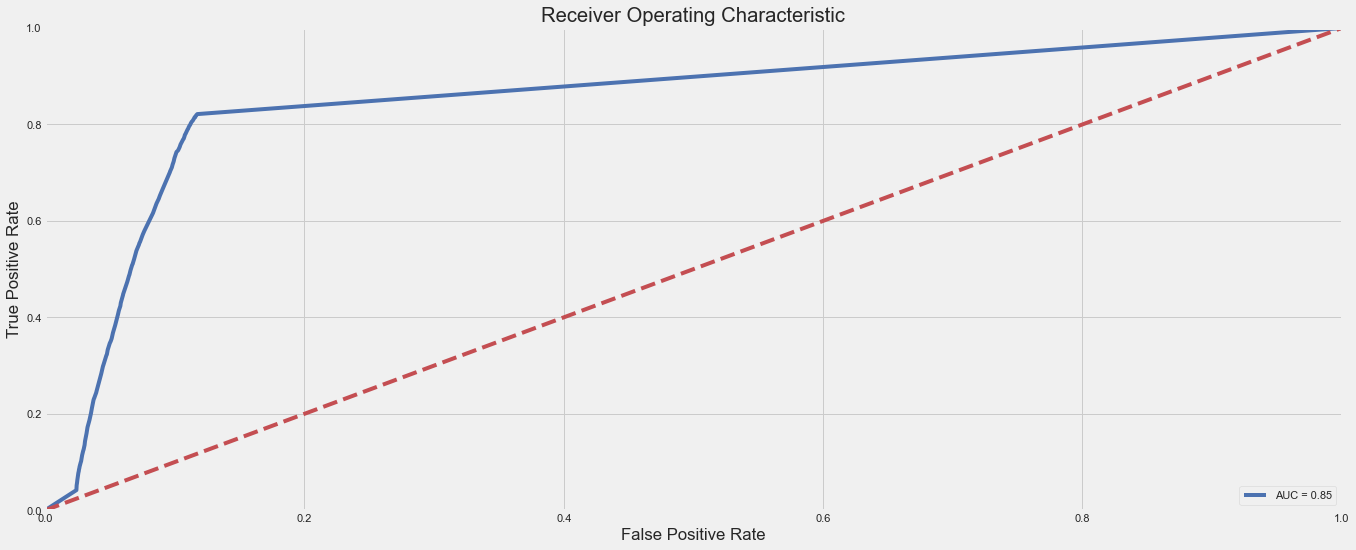

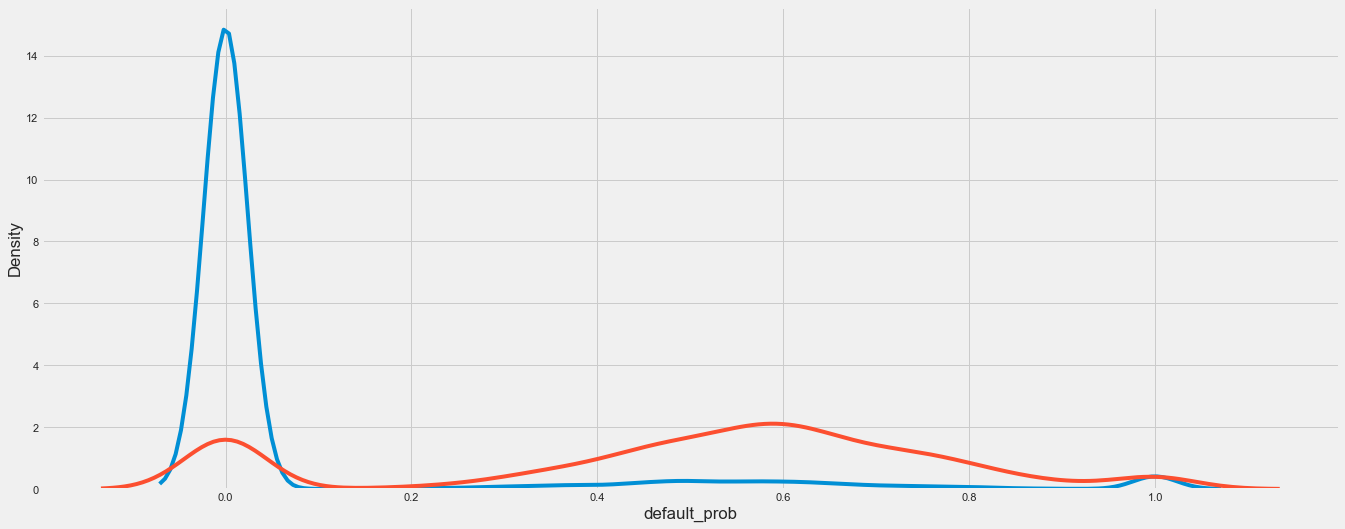

true_class  predicted_class
0           0                  0.923457
            1                  0.076543
1           1                  0.579226
            0                  0.420774
Name: predicted_class, dtype: float64


In [44]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
eval_model(dt, x_test, y_test)

Fokus ke Data yang sudah menggunakan SMOTE (dinormalisasikan terlebih dahulu oleh kami)

In [45]:
smote = SMOTE()
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)

Logistic Regression

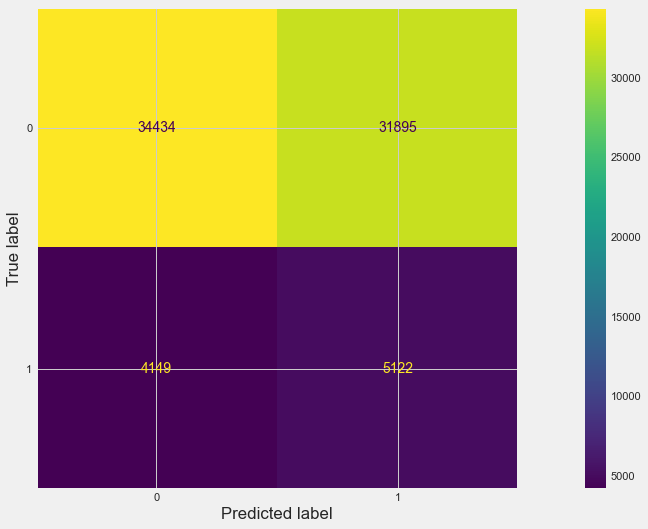



Accuracy:  0.5232275132275133
Precision:  0.1383688575519356
Recall:  0.5524754611153058
F1:  0.22131005876253024
AUC:  0.5588162892532068


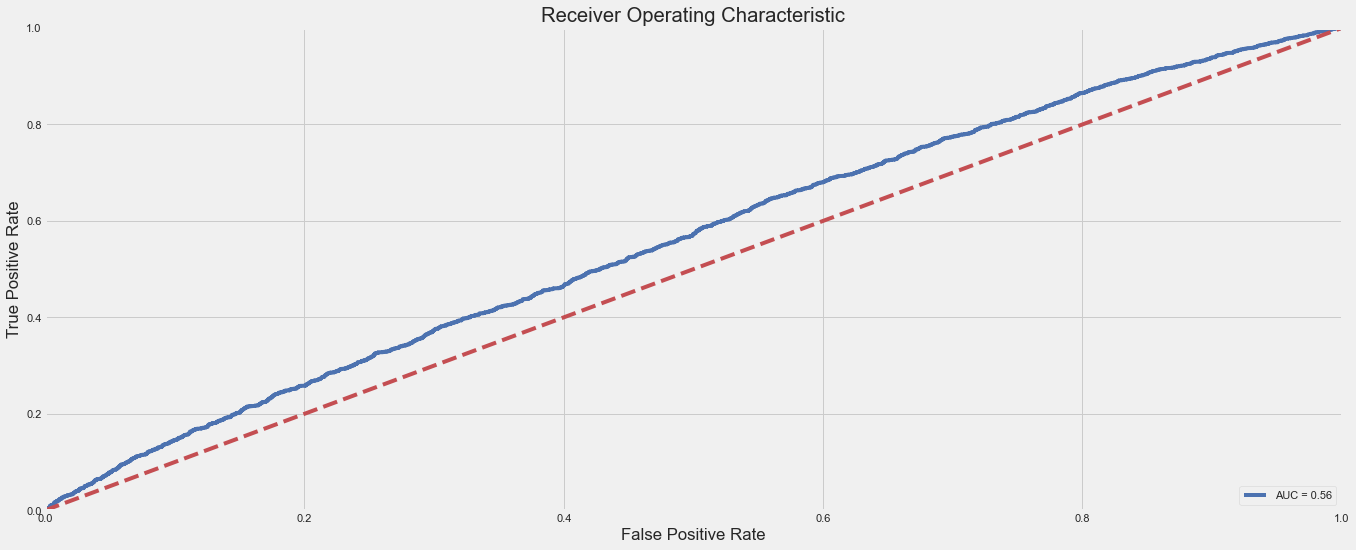

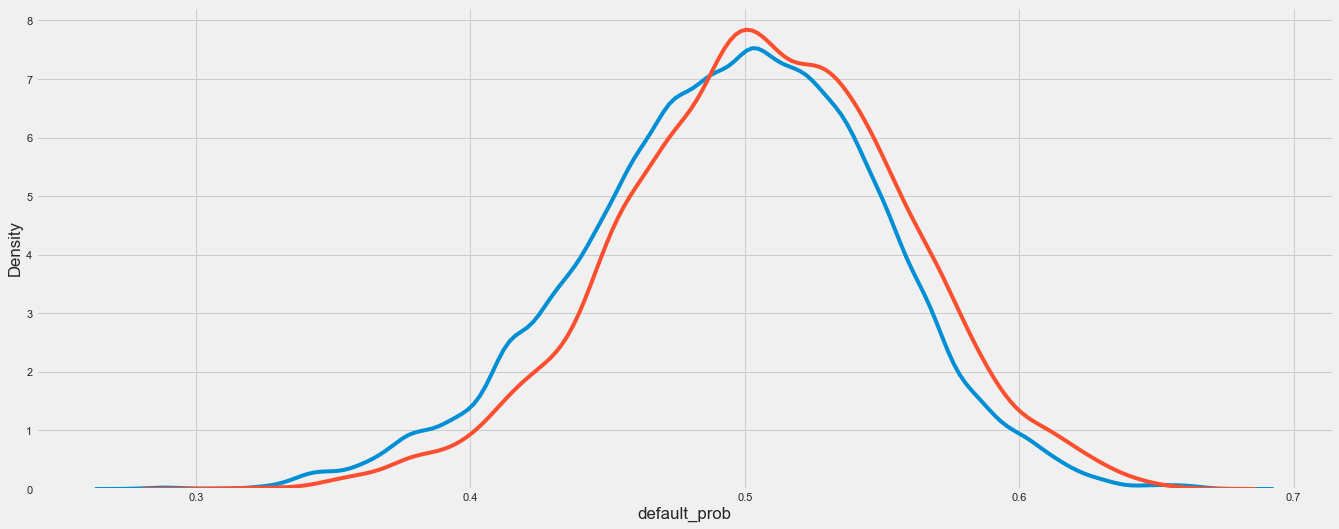

true_class  predicted_class
0           0                  0.519139
            1                  0.480861
1           1                  0.552475
            0                  0.447525
Name: predicted_class, dtype: float64


In [46]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_s, y_train_s)
eval_model(logistic_model, x_test, y_test)

Raindrop Forest

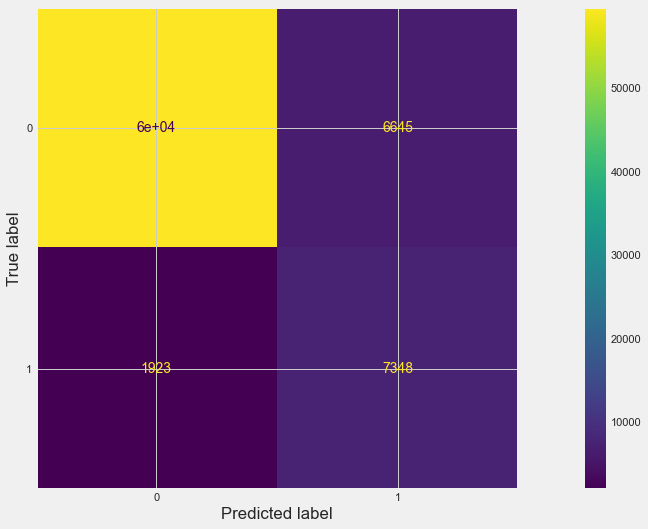



Accuracy:  0.8866666666666667
Precision:  0.5251197027084971
Recall:  0.7925790098155538
F1:  0.6317056396148556
AUC:  0.9374397790128975


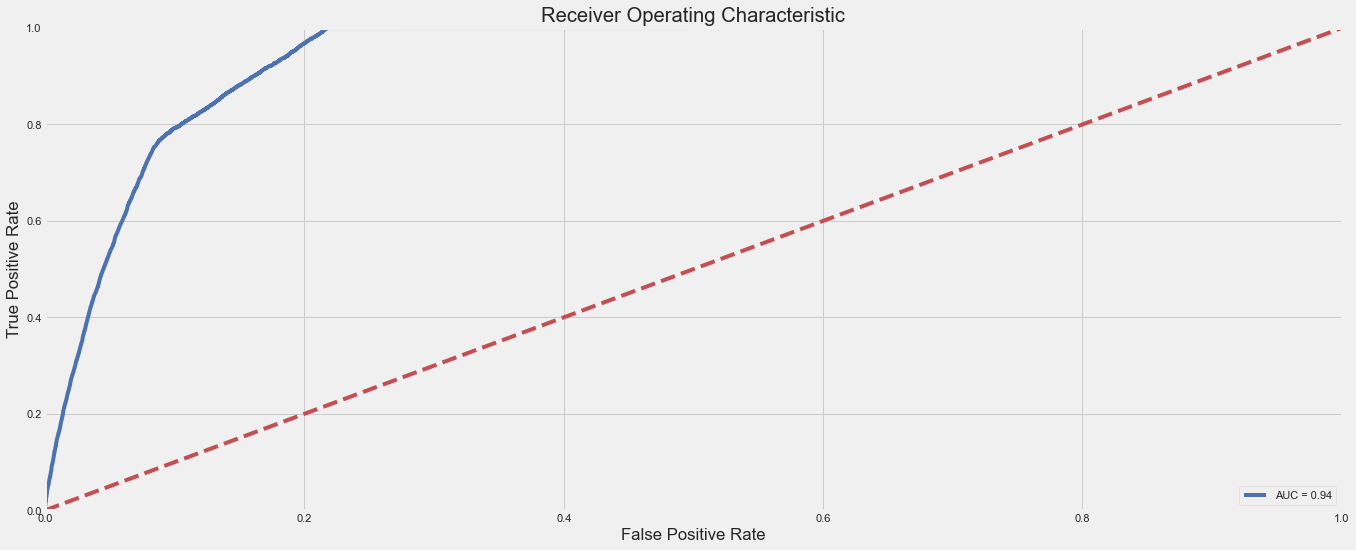

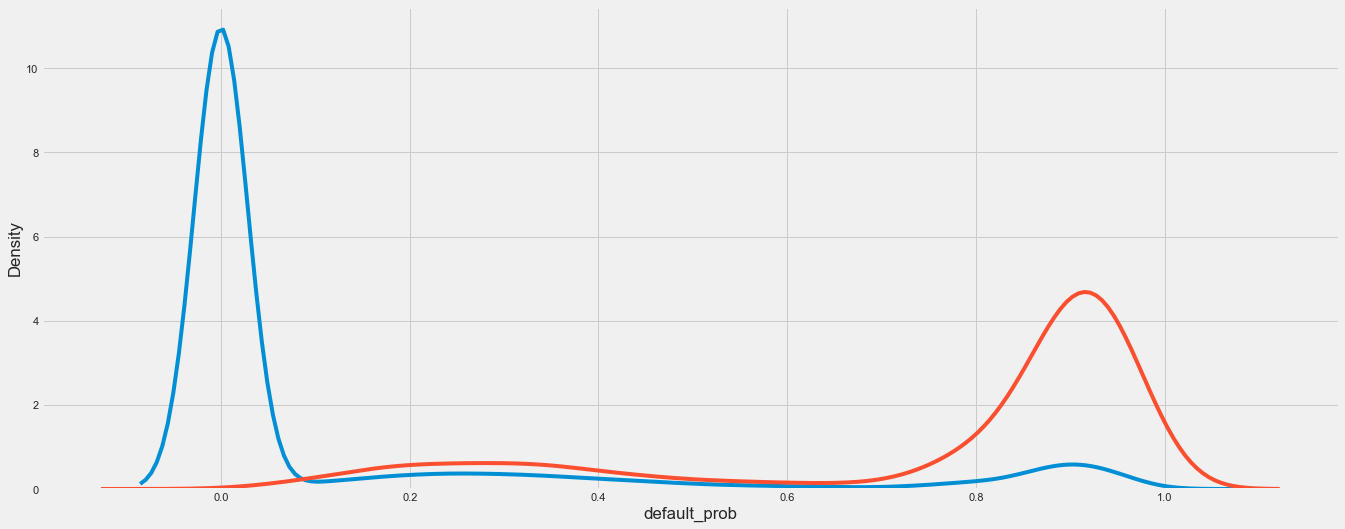

true_class  predicted_class
0           0                  0.899818
            1                  0.100182
1           1                  0.792579
            0                  0.207421
Name: predicted_class, dtype: float64


In [47]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train_s, y_train_s)
eval_model(rfc_model, x_test, y_test)

K-Neighborhood

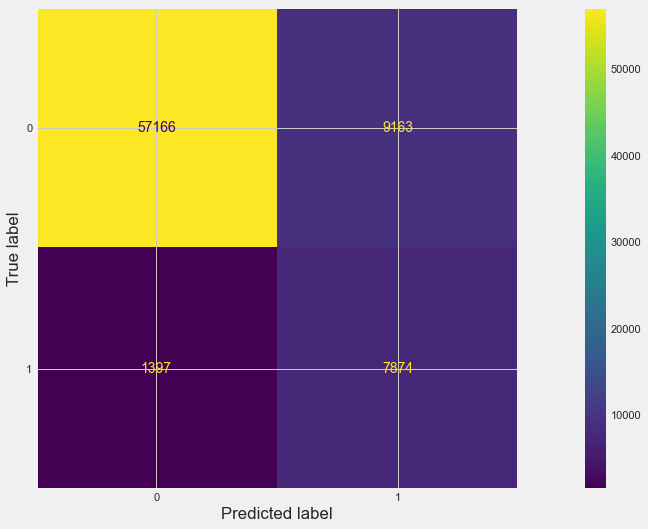



Accuracy:  0.8603174603174604
Precision:  0.4621705699360216
Recall:  0.8493150684931506
F1:  0.5986011859510415
AUC:  0.8861378836237862


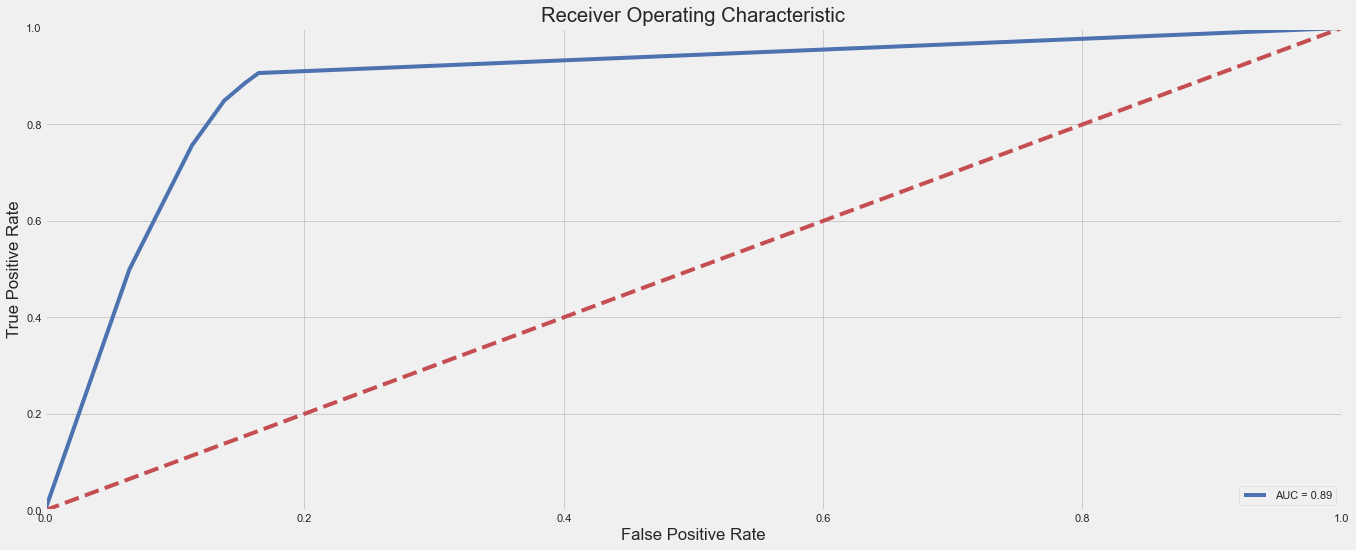

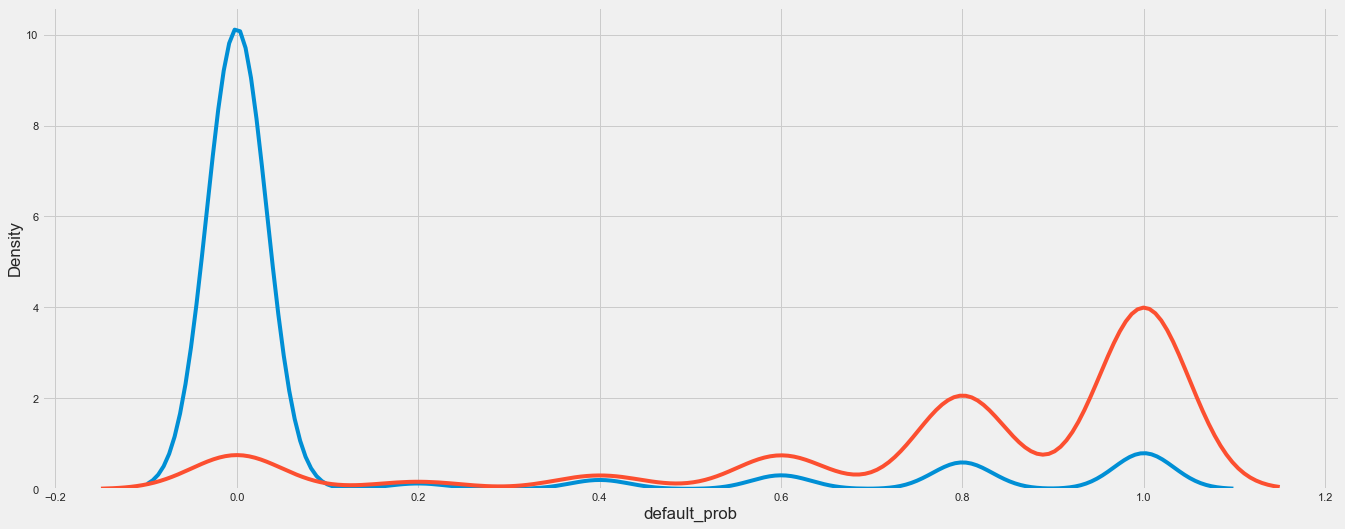

true_class  predicted_class
0           0                  0.861855
            1                  0.138145
1           1                  0.849315
            0                  0.150685
Name: predicted_class, dtype: float64


In [48]:
knn = KNeighborsClassifier()
knn.fit(x_train_s, y_train_s)
eval_model(knn, x_test, y_test)

Decision Tree

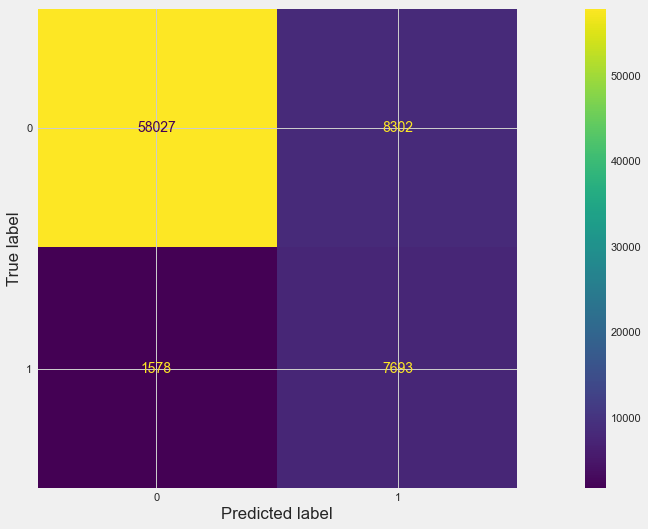



Accuracy:  0.8693121693121693
Precision:  0.48096280087527354
Recall:  0.8297918239672096
F1:  0.608960658592575
AUC:  0.8486582881199543


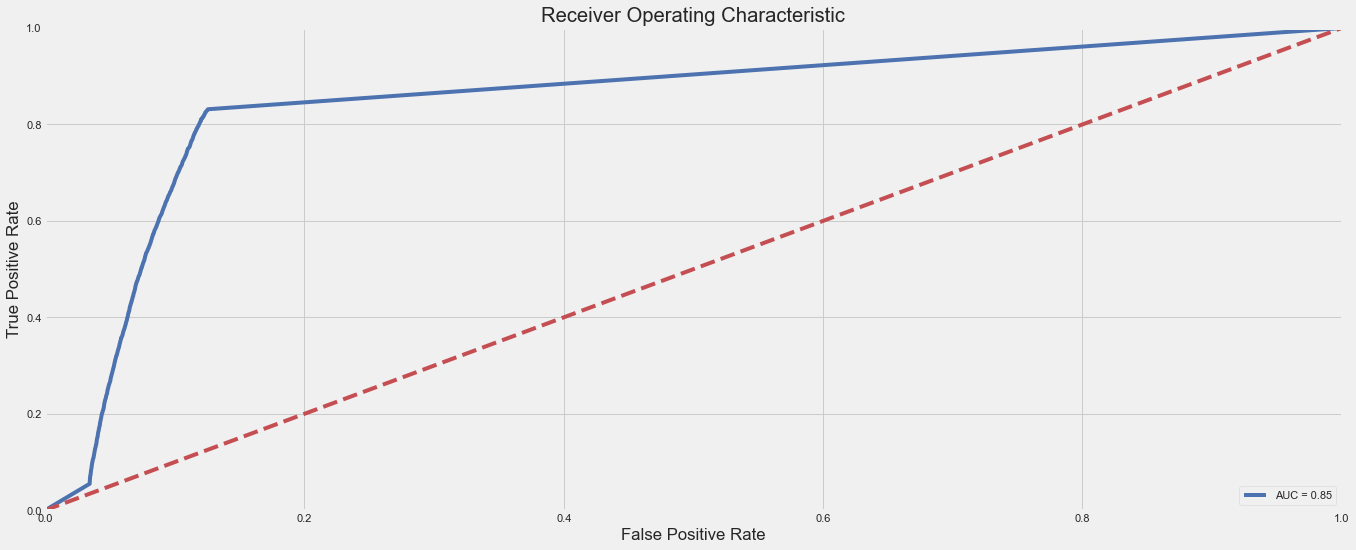

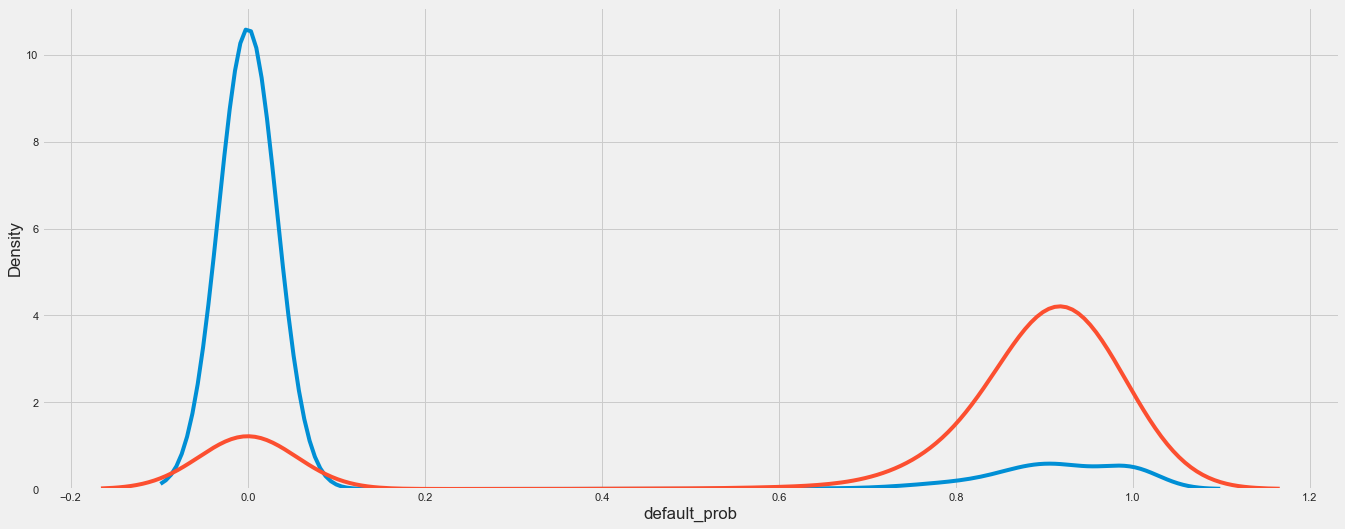

true_class  predicted_class
0           0                  0.874836
            1                  0.125164
1           1                  0.829792
            0                  0.170208
Name: predicted_class, dtype: float64


In [49]:
dt = DecisionTreeClassifier()
dt.fit(x_train_s, y_train_s)
eval_model(dt, x_test, y_test)